<a href="https://colab.research.google.com/github/shubhtech26/Big_Data_Project/blob/main/ML_HealthInsaurance_Training_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Video Link: https://drive.google.com/file/d/1AMAOOpg4itJm_9oEWz-12yWByYbMeurh/view?usp=sharing

Insurance.csv dataset: https://drive.google.com/file/d/1LNv_i3E5Qw1j3f9_lkgHxyj3NojSUkVg/view?usp=sharing

Utilities_shallow.ipynb: https://drive.google.com/file/d/1nFLAiEMfFknqWPvgp1bXbHAJ9PEkNL-9/view?usp=sharing

# **Health Insurance Premium Prediction**







### **Introduction**


Health insurance is a critical component of modern financial planning, providing individuals and families with a safety net against high medical expenses. However, the cost of insurance premiums can vary significantly based on several factors, including age, gender, Body Mass Index (BMI), smoking status, number of dependents, and geographic location.  For both individuals and insurers, accurately estimating these premiums is essential.

From the perspective of individuals, understanding potential costs can aid in financial planning and encourage proactive steps toward healthier living. For insurers, accurate premium predictions ensure fair pricing, which balances customer affordability with business sustainability.

**Problem Statement**

The cost of health insurance premiums is highly individualized and influenced by multiple factors. Estimating these premiums is a complex problem, as it involves identifying and modeling relationships between diverse features such as health metrics (e.g., BMI), behavioral factors (e.g., smoking), and demographic data (e.g., age, region). The lack of transparency in how these premiums are determined often leaves customers uncertain about the fairness or accuracy of their rates.



 **Motivation**

**Empowering Individuals:**  
We aim to provide individuals with a tool to estimate their premiums, increasing transparency in the insurance process. We also want to highlight key factors affecting their premiums, encouraging healthier habits that could help reduce costs.

**Supporting Insurers:**  
We want to assist insurance companies in building data-driven models that balance affordability and risk assessment. By identifying the most influential features driving premium costs, We hope to help insurers design more tailored and effective policies.


# **Data Exploration**

# Loading the libraries

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats




# Loading the Dataset

### About the Dataset  

For this project, we used a dataset from [Kaggle](https://www.kaggle.com/datasets/noordeen/insurance-premium-prediction) that provides detailed information about health insurance premiums and the factors that influence them. The dataset includes 1,338 records, each representing an individual’s profile and their insurance costs. It features the following key details:

- **Age:** The individual’s age.  
- **Sex:** Gender (male or female).  
- **BMI:** Body Mass Index, a measure of body fat based on height and weight.  
- **Children:** The number of dependent children covered by the insurance.  
- **Smoker:** Whether the individual is a smoker.  
- **Region:** The person’s region of residence in the U.S. (northeast, northwest, southeast, southwest).  
- **Charges:** The insurance premium (this is our target variable).

### Why This Dataset?  

We found this dataset to be an excellent fit for our project because it covers a wide range of factors that impact health insurance costs. It includes both numerical data, like age and BMI, and categorical data, like smoking status and region, allowing us to explore a variety of relationships.

What we liked most about this dataset is its real-world relevance. It includes common predictors of health risks, such as BMI and smoking habits, as well as demographic details like age and region. This makes it highly practical for understanding how these factors influence insurance premiums.

### Perfect for Our Goals  

With 1,338 records, the dataset is the right size for building and testing machine learning models without being overly complex. It allowed us to explore both simple and advanced techniques to see how well they perform. Overall, this dataset gave us the opportunity to dive deep into health insurance costs and create meaningful insights that can help individuals and insurers alike.

In [ ]:
 dataset= pd.read_csv("/content/insurance.csv")

# Understanding the Data


### No of Rows and Columns in a Dataset

In [ ]:
dataset.shape


(1338, 7)

In [ ]:
dataset.columns


Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'expenses'], dtype='object')

### Insight of a Dataset

In [ ]:
dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


The output of dataset.info() provides a summary of the DataFrame's structure, including the number of entries, columns, non-null counts, and data types.

**No Missing Data:**

Since all columns have non-null counts equal to the total number of entries (1338), no missing value imputation is required.

**Categorical vs Numerical Columns:**

Categorical Columns: sex, smoker, region (require encoding for machine learning models).
Numerical Columns: age, bmi, children, expenses (can be directly used for modeling after normalization or scaling if needed).

**Target Variable:**

The target variable, expenses, is a continuous numerical feature, indicating a regression problem.

**Dataset Size:**

The dataset is relatively small (1338 rows and 7 columns), making it suitable for training and testing on standard hardware.

### Printing First 5 rows and Last 5 rows of a Dataset

In [ ]:
dataset.head()

age     sex   bmi  children smoker     region  expenses
0   19  female  27.9         0    yes  southwest  16884.92
1   18    male  33.8         1     no  southeast   1725.55
2   28    male  33.0         3     no  southeast   4449.46
3   33    male  22.7         0     no  northwest  21984.47
4   32    male  28.9         0     no  northwest   3866.86

In [ ]:
dataset.tail()


age     sex   bmi  children smoker     region  expenses
1333   50    male  31.0         3     no  northwest  10600.55
1334   18  female  31.9         0     no  northeast   2205.98
1335   18  female  36.9         0     no  southeast   1629.83
1336   21  female  25.8         0     no  southwest   2007.95
1337   61  female  29.1         0    yes  northwest  29141.36

### To Check if the value contains N/A

In [ ]:
dataset.isna().sum()


age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64


### Print Numerical Columns and Categorical Columns

In [ ]:
All_columns         = list(dataset)
Numeric_columns     = ['age', 'bmi', 'children', 'expenses']
Categorical_columns = [x for x in All_columns if x not in Numeric_columns ]

print('\nNumeric columns')
print(Numeric_columns)
print('\nCategorical columns')
print(Categorical_columns)


Numeric columns
['age', 'bmi', 'children', 'expenses']

Categorical columns
['sex', 'smoker', 'region']


We ran the function to identify and categorize the columns in the dataset into numeric columns and categorical columns. It provides a clear separation, which is useful for preprocessing steps like encoding categorical variables or scaling numeric variables.



### Insight on numerical features

In [ ]:
dataset.describe().T

count          mean           std      min        25%      50%  \
age       1338.0     39.207025     14.049960    18.00    27.0000    39.00   
bmi       1338.0     30.665471      6.098382    16.00    26.3000    30.40   
children  1338.0      1.094918      1.205493     0.00     0.0000     1.00   
expenses  1338.0  13270.422414  12110.011240  1121.87  4740.2875  9382.03   

                75%       max  
age          51.000     64.00  
bmi          34.700     53.10  
children      2.000      5.00  
expenses  16639.915  63770.43

### Getting more insight on Target Dataset

In [ ]:
from scipy.stats import kurtosis, skew, stats
print(dataset['expenses'].describe())
print("=" * 30)


# Calculate and print skewness and kurtosis for 'expenses' column
print(f"Skew: {skew(dataset['expenses']):.2f}")
print(f"Kurtosis: {kurtosis(dataset['expenses']):.2f}")

count     1338.000000
mean     13270.422414
std      12110.011240
min       1121.870000
25%       4740.287500
50%       9382.030000
75%      16639.915000
max      63770.430000
Name: expenses, dtype: float64
Skew: 1.51
Kurtosis: 1.60


A skewness of 1.51 indicates a moderate positive skew, which means the expense data has a longer tail on the right side.

The kurtosis of 1.60 suggests that the distribution is moderately peaked, hinting at the presence of a few extreme values

# Data Analysis






### Density plot and Box Plot

This analysis focuses on exploring the distribution of the target variable, expenses, to understand its overall behavior, identify skewness, and detect the presence of outliers. This insight is crucial for interpreting the variability in insurance premium costs and preparing the data for modeling.



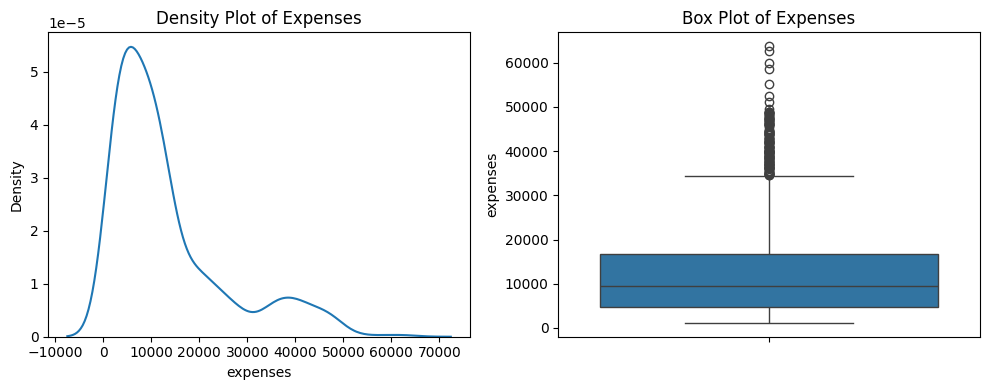

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

sns.kdeplot(dataset['expenses'], ax=axes[0])
axes[0].set_title('Density Plot of Expenses')

sns.boxplot(dataset['expenses'], ax=axes[1])
axes[1].set_title('Box Plot of Expenses')

plt.tight_layout()
plt.show()


Density Plot:

The expenses exhibit a right-skewed distribution, with a majority of the data concentrated toward lower values.
A long tail is observed, indicating the presence of higher expense values for a smaller subset of individuals, likely those with significant health risks or medical needs.

Box Plot:

The median expenses are relatively low, reinforcing the concentration of data in the lower range.
The plot reveals several outliers—individuals with exceptionally high expenses. These outliers likely represent high-risk cases, such as smokers or individuals with high BMI.

### Univariate Analysis

The function described below performs a comprehensive univariate analysis of numerical features in the dataset, incorporating both visualizations and statistical summaries. The focus is on understanding the distribution of individual numerical features, detecting outliers, and identifying patterns or trends within the data.




Analyzing Column: age
Count of outliers: 0
Lower Bound: -9.00, Upper Bound: 87.00
Percentage of Outliers: 0.00%


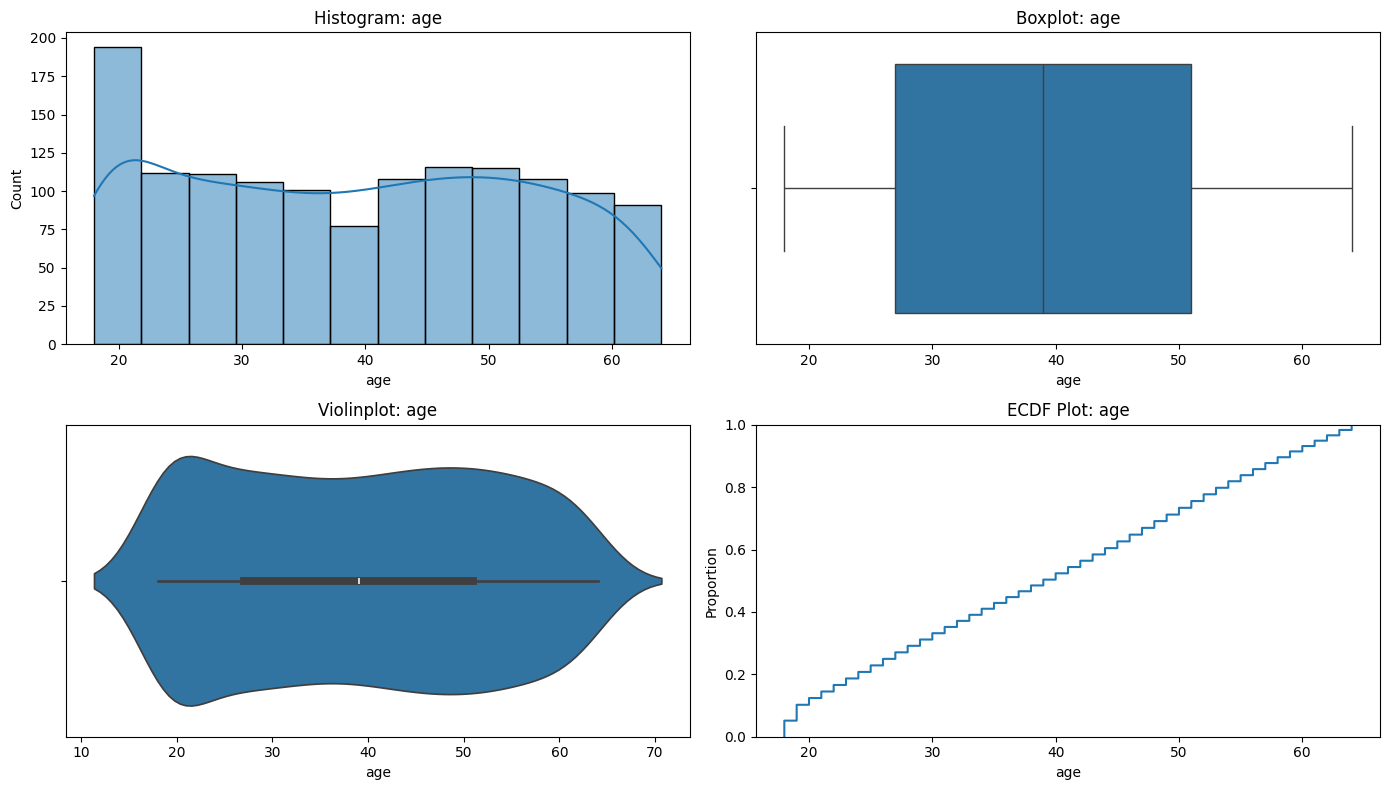


Analyzing Column: bmi
Count of outliers: 9
Lower Bound: 13.70, Upper Bound: 47.30
Percentage of Outliers: 0.67%


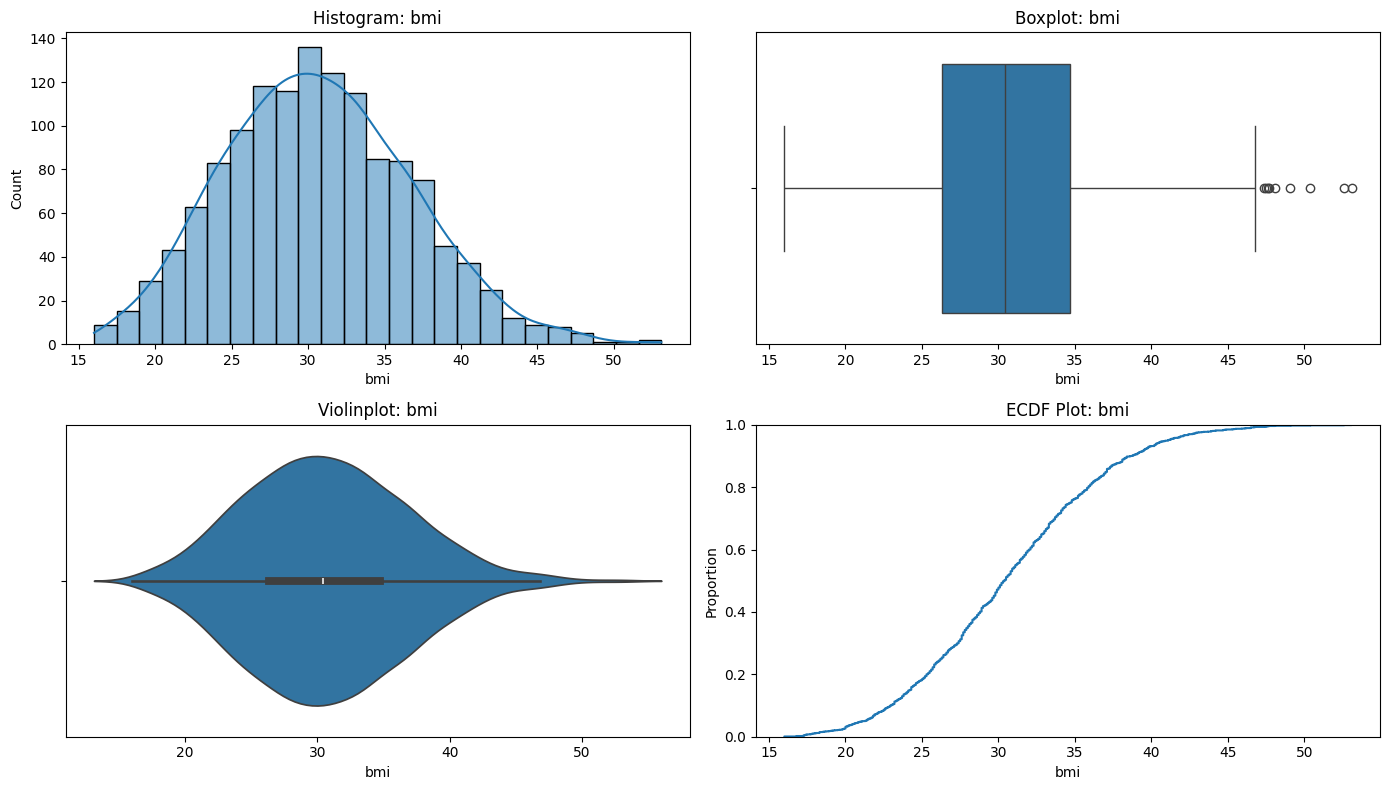


Analyzing Column: children
Count of outliers: 0
Lower Bound: -3.00, Upper Bound: 5.00
Percentage of Outliers: 0.00%


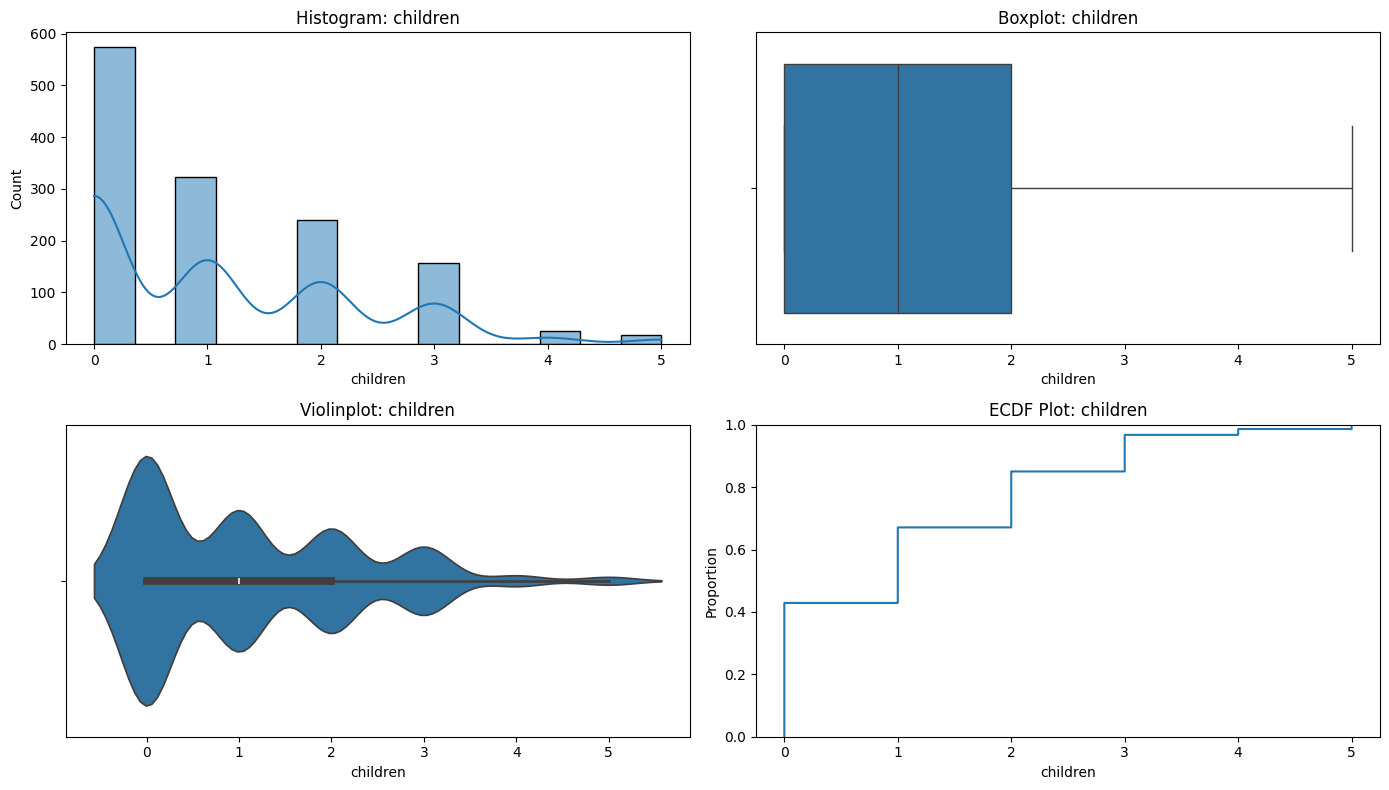


Analyzing Column: expenses
Count of outliers: 139
Lower Bound: -13109.15, Upper Bound: 34489.36
Percentage of Outliers: 10.39%


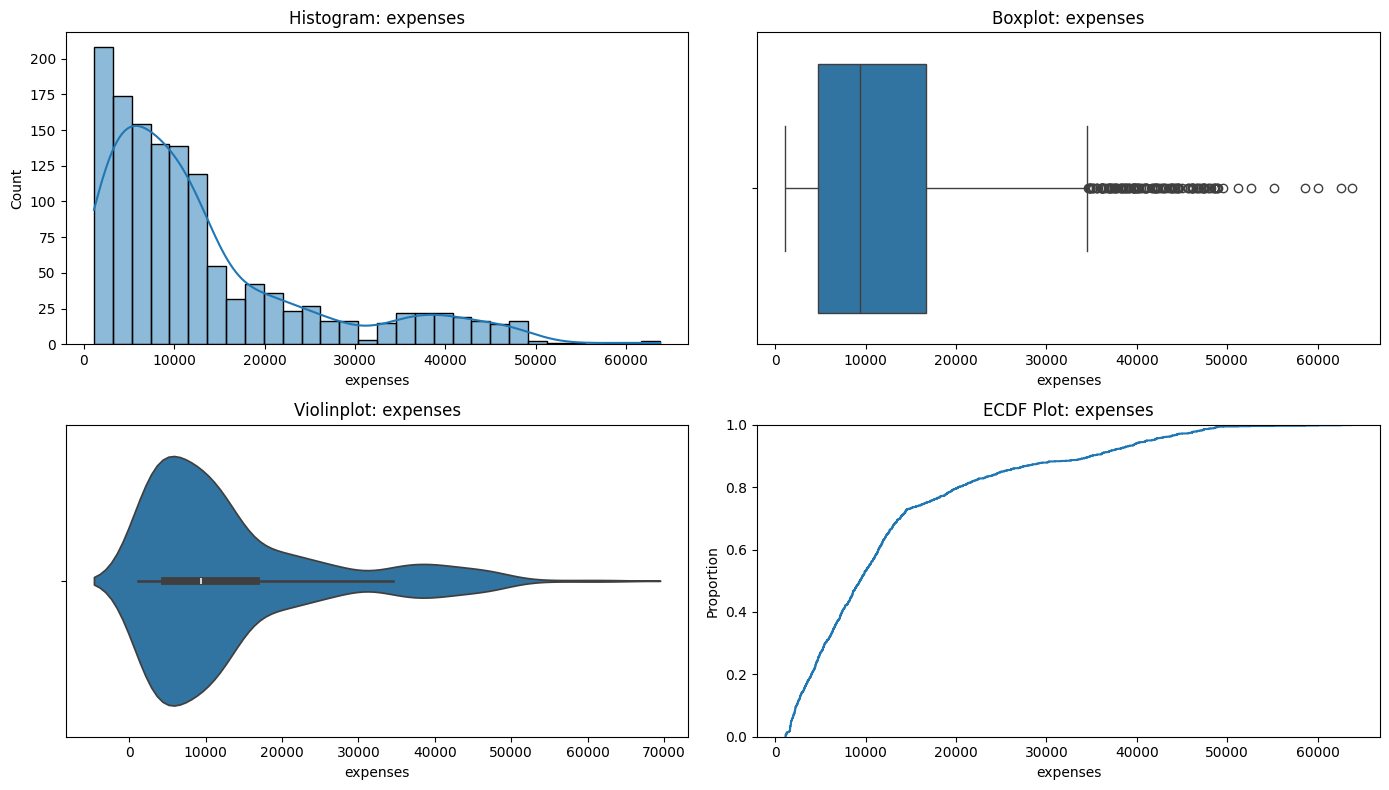

In [ ]:
def univariate_analysis_with_outliers(dataset):
    numeric_cols = dataset.select_dtypes(include='number')

    for col in numeric_cols:
        print(f"\nAnalyzing Column: {col}\n" + "=" * 30)

        # Calculate IQR and detect outliers
        Q1 = dataset[col].quantile(0.25)
        Q3 = dataset[col].quantile(0.75)
        IQR = Q3 - Q1
        LTV = Q1 - 1.5 * IQR
        UTV = Q3 + 1.5 * IQR
        outliers = dataset[(dataset[col] < LTV) | (dataset[col] > UTV)][col]

        print(f"Count of outliers: {len(outliers)}")
        print(f"Lower Bound: {LTV:.2f}, Upper Bound: {UTV:.2f}")
        print(f"Percentage of Outliers: {len(outliers) / len(dataset[col]) * 100:.2f}%")

        # Create subplots for univariate plots
        plt.figure(figsize=(14, 8))

        plt.subplot(2, 2, 1)
        sns.histplot(dataset[col], kde=True)
        plt.title(f'Histogram: {col}')

        plt.subplot(2, 2, 2)
        sns.boxplot(x=dataset[col])
        plt.title(f'Boxplot: {col}')

        plt.subplot(2, 2, 3)
        sns.violinplot(x=dataset[col])
        plt.title(f'Violinplot: {col}')

        plt.subplot(2, 2, 4)
        sns.ecdfplot(dataset[col])
        plt.title(f'ECDF Plot: {col}')

        plt.tight_layout()
        plt.show()

# Call the combined function on your dataset
univariate_analysis_with_outliers(dataset)

**Key insights from the distribution of numerical features in the dataset are as follows:**

This univariate analysis reveals important patterns and anomalies in the dataset.

For instance, we find out that the dominance of individuals in their early 20s, the uniformity in BMI distribution with some outliers, and the heavily skewed nature of expenses provide valuable insights for further analysis and model building. These findings will guide data preprocessing and help tailor the machine learning model for optimal performance.








### Lets Dive into Categorical Columns



The objective of this analysis is to examine the distribution of categorical features in the dataset.We ran this code to understand the distribution of categorical variables is essential for exploring patterns, identifying imbalances, and assessing their potential influence on the target variable (insurance expenses).



<ipython-input-6-2c10a4ca3e41>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=dataset[cat1[i]], palette='Set2')  # Use a multi-color palette
<ipython-input-6-2c10a4ca3e41>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=dataset[cat1[i]], palette='Set2')  # Use a multi-color palette
<ipython-input-6-2c10a4ca3e41>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=dataset[cat1[i]], palette='Set2')  # Use a multi-color palette


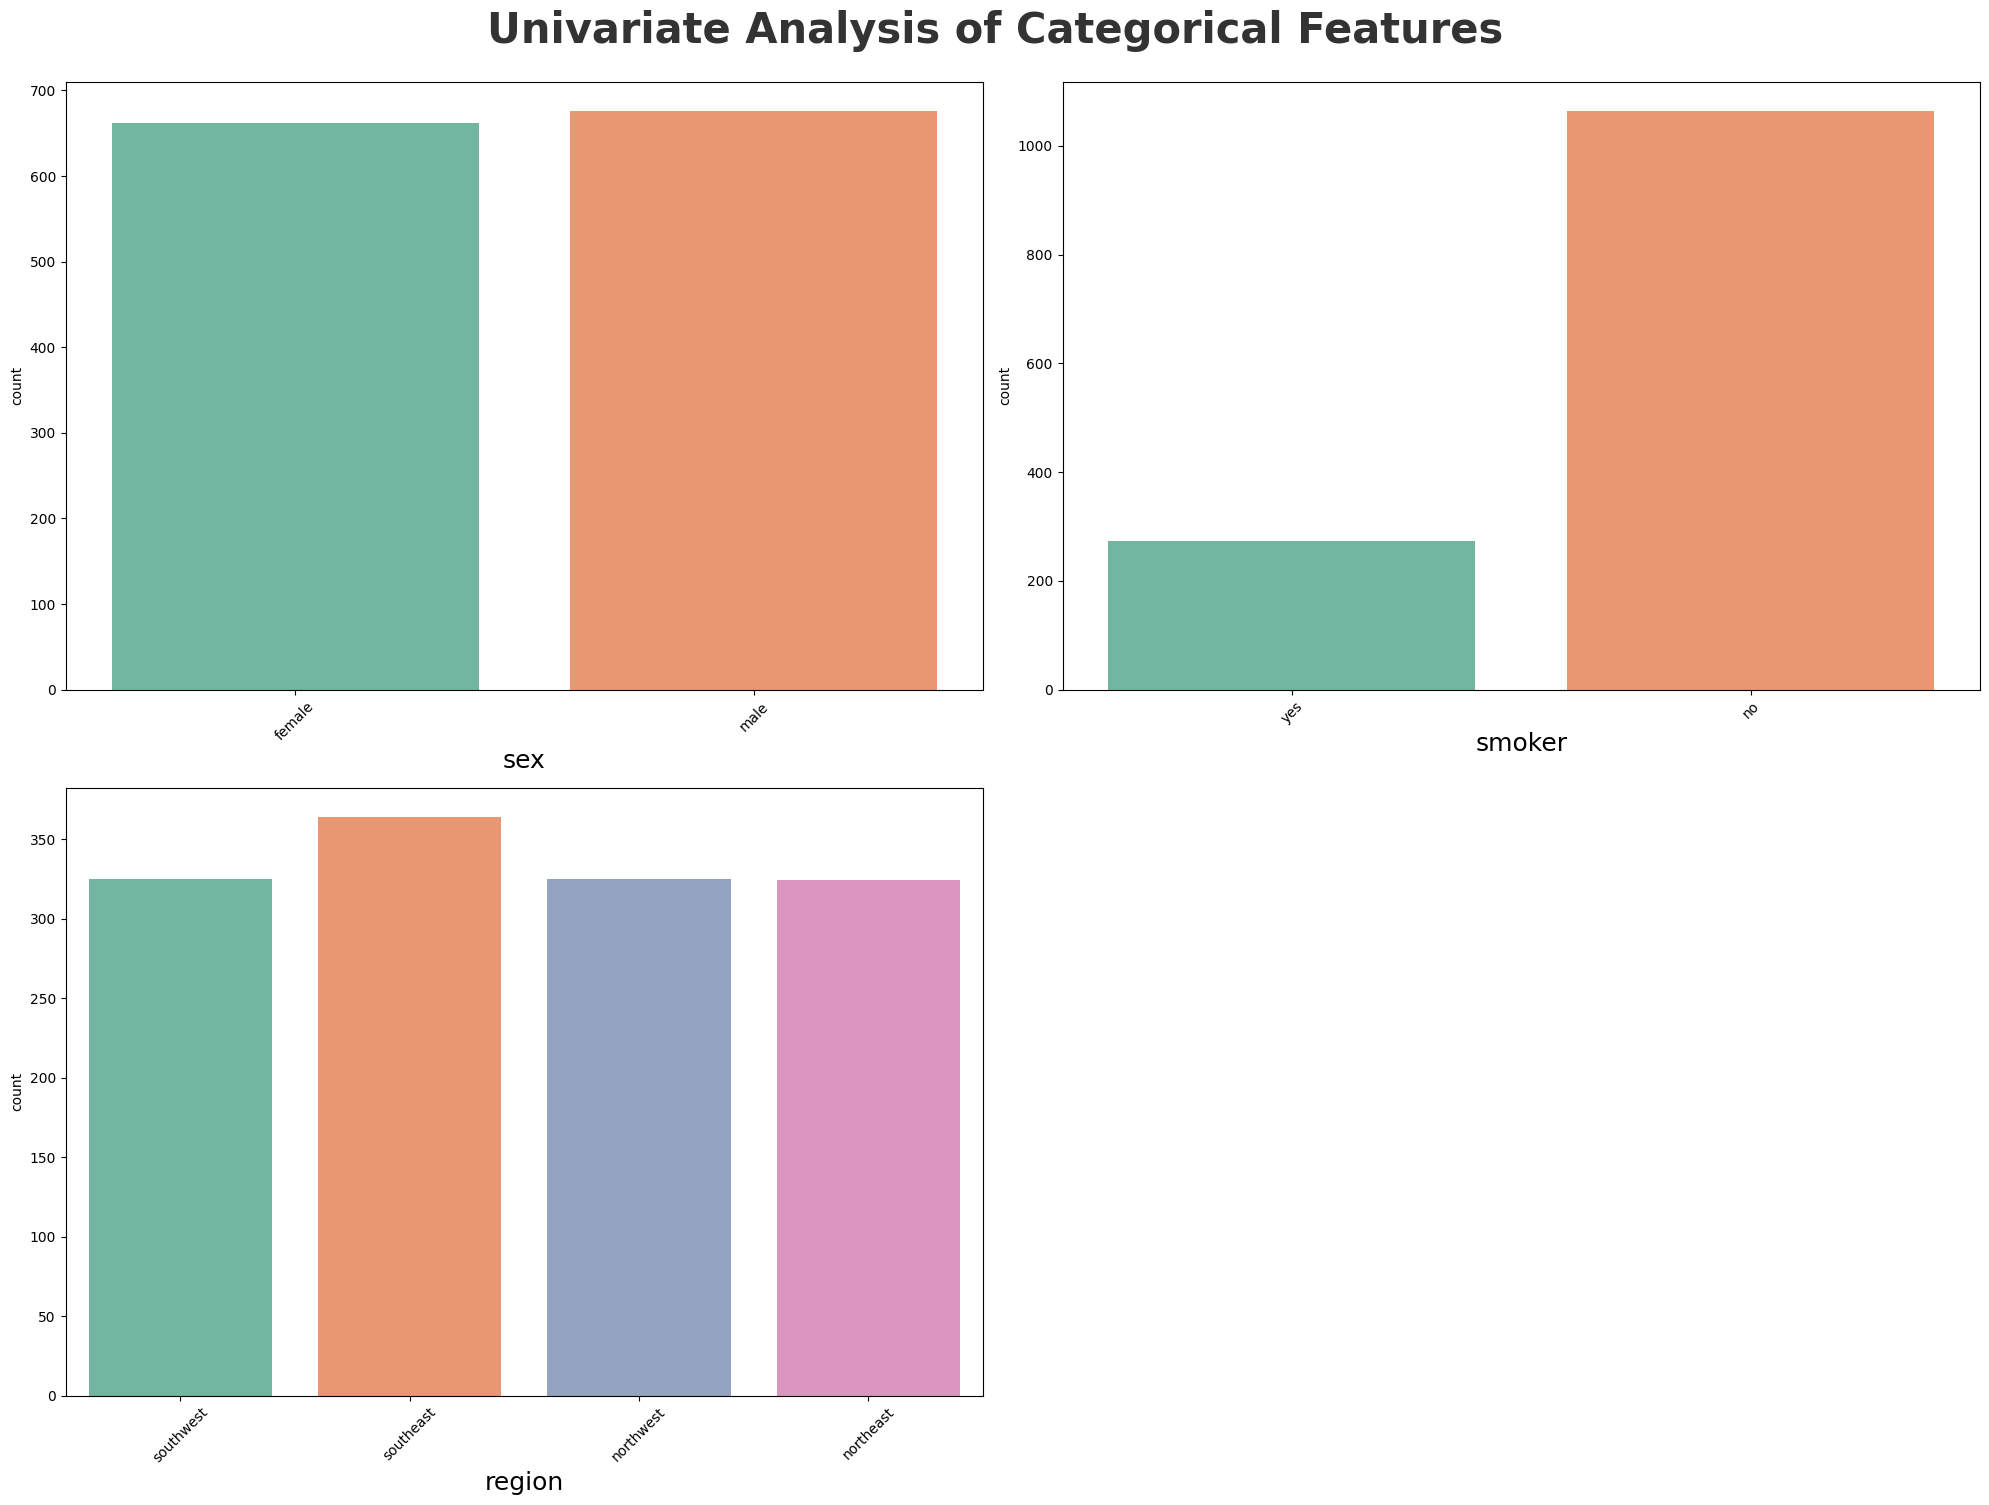

In [ ]:
plt.figure(figsize=(20, 15))
plt.suptitle('Univariate Analysis of Categorical Features', fontsize=30, fontweight='bold', alpha=0.8, y=1.)  # Increased fontsize

cat1 = ['sex', 'smoker', 'region']

for i in range(len(cat1)):
    plt.subplot(2, 2, i + 1)
    sns.countplot(x=dataset[cat1[i]], palette='Set2')  # Use a multi-color palette
    plt.xlabel(cat1[i], fontsize=18)  # Optional: increase xlabel font size
    plt.xticks(rotation=45)
    plt.tight_layout()

plt.show()


**Features Analyzed: Three categorical columns were considered:**

Sex: From the above plot ,we know that there are slight more number of males than females.

Smoker: From the above plot ,we observe that significant population does not smoke.

Region: From the above plot , we can consider that population is almost equally distributed in the reigon with southeast having more number of people.

## Analysis on some features

### Age

This visualization explores the distribution of the age feature in the dataset. The aim is to understand how individuals across different age groups are represented and identify patterns that might influence health insurance premiums.



<ipython-input-21-cff6aa9be722>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=dataset, x='age', palette='hls')


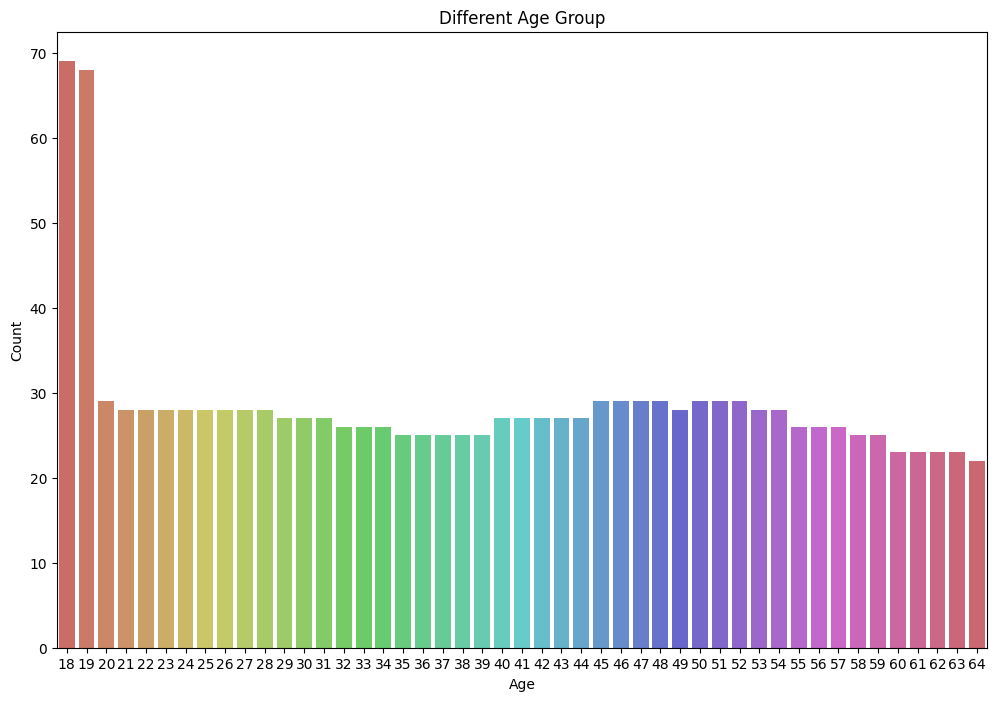

In [ ]:
plt.figure(figsize=(12,8))
sns.countplot(data=dataset, x='age', palette='hls')
plt.title("Different Age Group")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

This visualization aims to analyze the distribution of individuals across various age groups within the dataset. Understanding the age distribution was crucial for identifying demographic trends and their potential influence on health insurance premiums.



As we can see there are more teens whoose age is between 18 and 19

## BMI

The goal of this visualization is to explore the distribution of the BMI (Body Mass Index) feature in the dataset. Understanding the distribution of BMI values helps identify common trends, detect outliers, and analyze the role of BMI in determining health insurance premiums.



<ipython-input-22-d9f3d2353fba>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['bmi'])


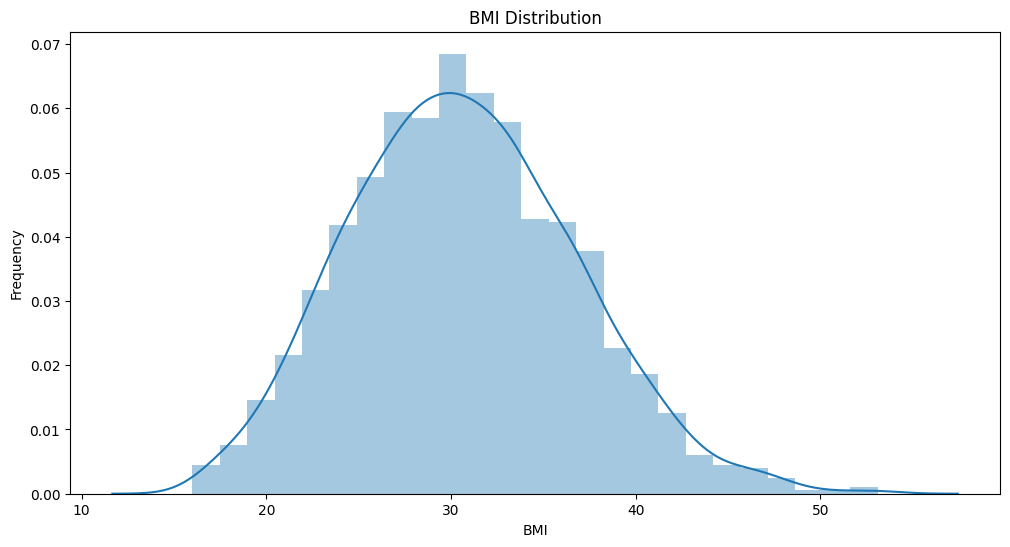

In [ ]:
plt.figure(figsize=(12,6))
sns.distplot(dataset['bmi'])
plt.title("BMI Distribution")
plt.xlabel("BMI")
plt.ylabel("Frequency")
plt.show()

**Central Tendency:**  
We observed that the distribution peaks around 25 to 30, indicating that most individuals in the dataset have a BMI within this range. This matches the average BMI range typically seen in adults.

**Right Tail:**  
We noticed a right tail in the distribution, with a smaller group of individuals having BMI values greater than 35. These individuals might represent those at higher health risk levels.

**Smooth Curve:**  
We added a density curve to the histogram, which helped me visualize the overall shape of the distribution and identify areas where the data is most concentrated.

### Number of Children

This visualization aims to analyze the distribution of the children feature in the dataset. The children column represents the number of dependent children associated with each individual, which is a potential factor in determining health insurance premiums.



<ipython-input-23-1165525172c7>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=dataset, x='children', palette='hls')


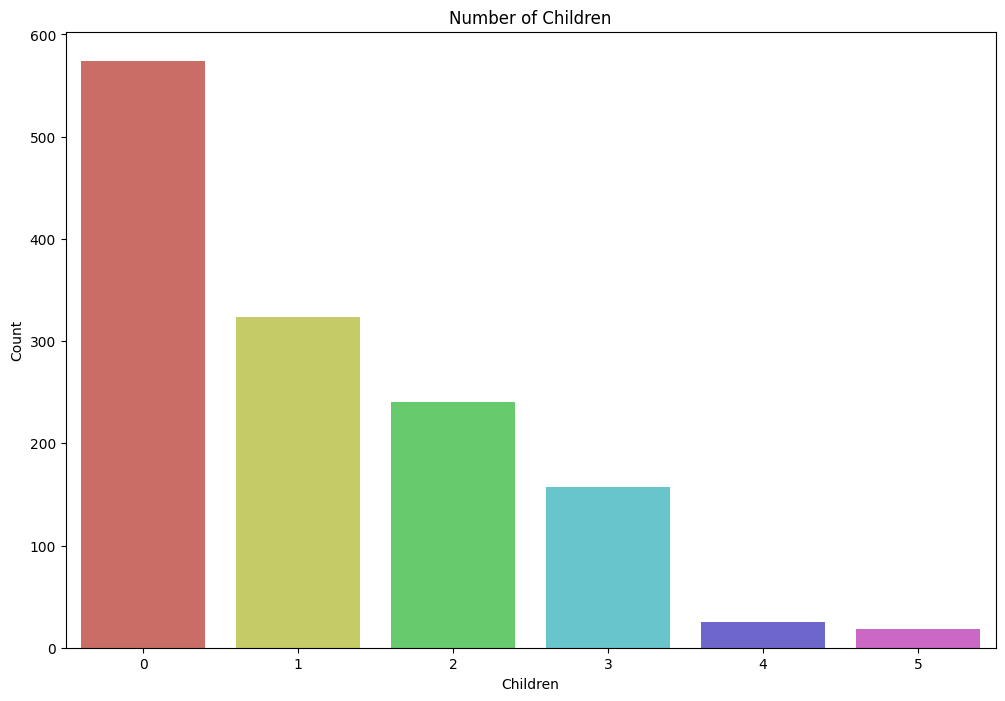

In [ ]:

plt.figure(figsize=(12,8))
sns.countplot(data=dataset, x='children', palette='hls')
plt.title("Number of Children")
plt.xlabel("Children")
plt.ylabel("Count")
plt.show()

We noticed that a significant portion of the dataset consists of individuals with no dependent children, suggesting that many people seeking health insurance are either single or without dependents.

**Gradual Decline with More Children:**  
The number of individuals decreases as the number of children increases, which indicates that fewer people in the dataset have larger families.

## Multivariate Analysis

### Smoking Habits By Gender

This visualization aims to compare smoking habits between males and females in the dataset. Understanding the distribution of smokers and non-smokers by gender helps identify potential trends and provides insights into how smoking habits influence health insurance premiums.



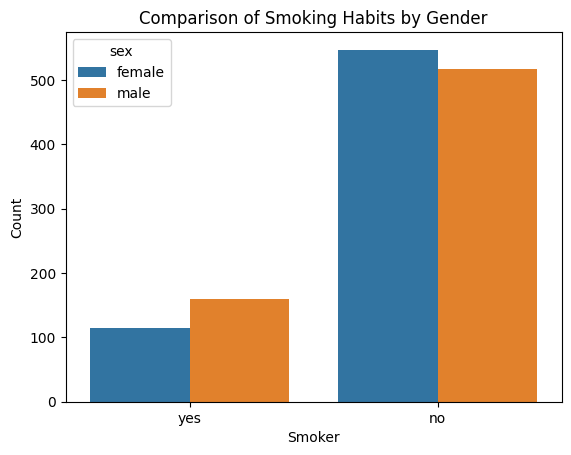

In [ ]:
sns.countplot(data=dataset, x='smoker', hue='sex')
plt.xlabel('Smoker')
plt.ylabel('Count')
plt.title('Comparison of Smoking Habits by Gender')
plt.show()


Among smokers, males appear to outnumber females, suggesting that smoking prevalence is higher among males in this dataset.

### Average BMI with age

This visualization explores the relationship between age and the average BMI (Body Mass Index). Understanding this trend can provide insights into how BMI evolves with age and its potential impact on health insurance premiums.



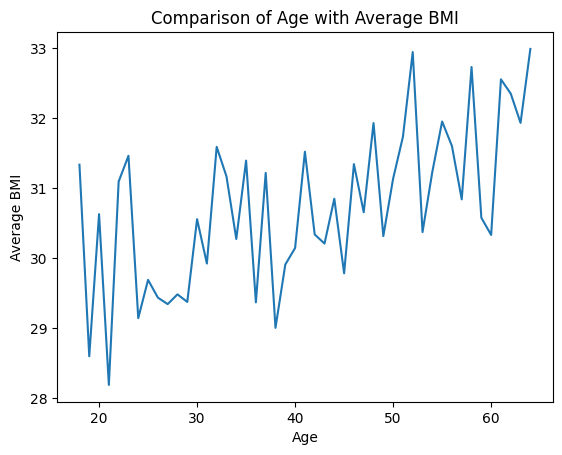

In [ ]:
average_bmi_by_age = dataset.groupby('age')['bmi'].mean()

plt.plot(average_bmi_by_age.index, average_bmi_by_age.values)
plt.xlabel('Age')
plt.ylabel('Average BMI')
plt.title('Comparison of Age with Average BMI')
plt.show()

We observed that the average BMI tends to increase with age, showing that older individuals generally have slightly higher BMI values compared to younger ones.

In the middle-aged groups (30–50), BMI stabilizes to some extent but continues to exhibit a slow upward trend.

After age 50, the BMI starts to rise more consistently, peaking around age 60.

## BMI vs Expense

In this regression plot, we visualized the relationship between Body Mass Index (BMI) and health insurance expenses. Our goal was to examine whether there’s a correlation between BMI and insurance costs, offering insights into how BMI might influence expenses.


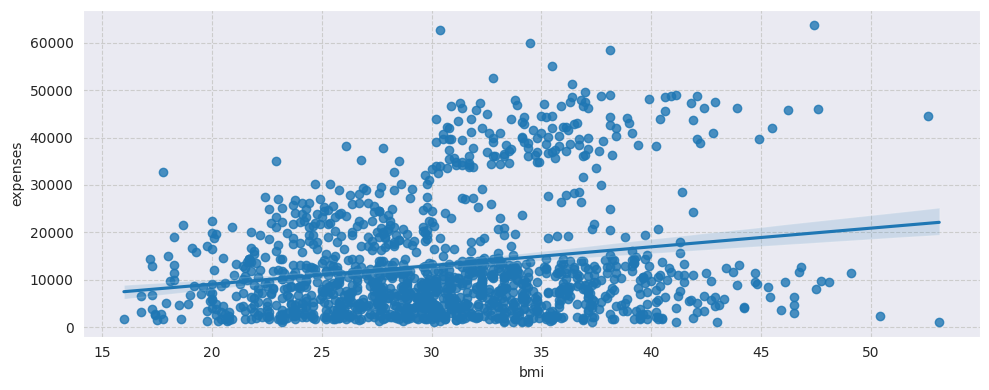

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for the plot
sns.set_style(style='darkgrid', rc={"grid.color": ".8", "grid.linestyle": "--"})

# Create a figure with the specified size
plt.figure(figsize=(10, 4))

# Create the regression plot
sns.regplot(x='bmi', y='expenses', data=dataset)

# Adjust layout to ensure everything fits
plt.tight_layout()

# Enable grid for the plot
plt.grid(True)

# Show the plot
plt.show()

The regression line shows a slight positive correlation between BMI and insurance expenses. We observed that as BMI increases, the average expenses also tend to rise. This trend makes sense, as individuals with higher BMI values are more likely to face health risks that could lead to higher healthcare costs.

### Average Expenses by Gender

In this bar plot, We compared the average health insurance expenses between males and females. Our aim was to identify any significant differences in the average expenses by gender and explore the potential reasons behind these differences.


<ipython-input-28-165da76f8280>:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(data=dataset, x='sex', y='expenses', estimator=np.mean, ci='sd')


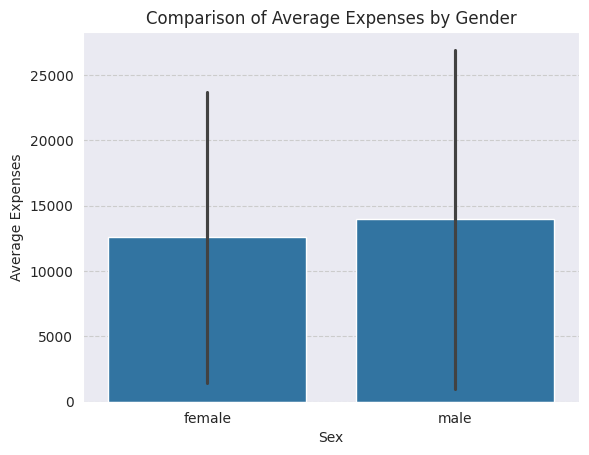

In [ ]:

sns.barplot(data=dataset, x='sex', y='expenses', estimator=np.mean, ci='sd')
plt.xlabel('Sex')
plt.ylabel('Average Expenses')
plt.title('Comparison of Average Expenses by Gender')
plt.show()

On average, We noticed that males have higher insurance expenses compared to females. This might reflect higher health risks or behavioral differences, such as higher smoking rates or BMI, that are commonly observed in males.

While males do have slightly higher average expenses, We found that the difference between genders isn’t drastic. This suggests that gender alone may not be the most significant factor influencing insurance costs.

### Children Vs Expenses

Bar plot shown below examines how the number of children affects the average health insurance expenses. The goal is to identify trends and assess whether having more dependents correlates with higher insurance costs.



<ipython-input-29-b1ab19e1e0a5>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='children',y='expenses',data=dataset,palette='viridis',saturation=0.9)


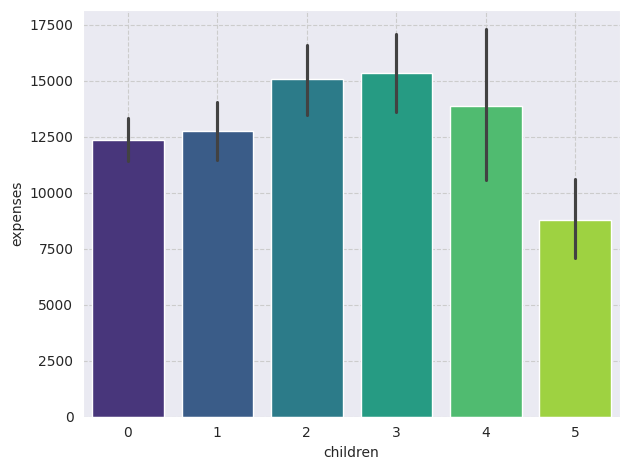

In [ ]:
sns.barplot(x='children',y='expenses',data=dataset,palette='viridis',saturation=0.9)
plt.tight_layout()
plt.grid(True)
plt.show()

The bar plot visualizes the relationship between the number of children (children) and the insurance expenses (expenses) based on the dataset.


1. Individuals with no children (0) have lower average insurance expenses compared to those with children.

2. Insurance expenses generally increase as the number of children rises, peaking at 3 or 4 children.

3. For individuals with 5 children, the average expense decreases compared to those with fewer children.


### Average Expenses by Region

Bar plot shown below compares the average health insurance expenses across different regions in the dataset. The goal is to identify regional trends in insurance costs and understand whether geographic factors influence premium pricing.



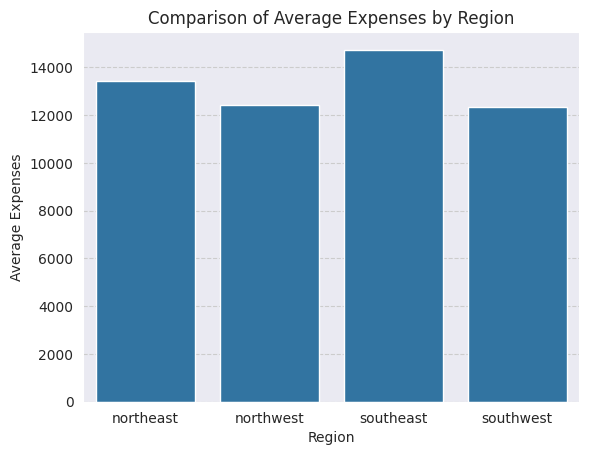

In [ ]:
average_expenses_by_region = dataset.groupby('region')['expenses'].mean()

# Create a bar plot to compare the average expenses by region
sns.barplot(x=average_expenses_by_region.index, y=average_expenses_by_region.values)
plt.xlabel('Region')
plt.ylabel('Average Expenses')
plt.title('Comparison of Average Expenses by Region')
plt.show()

**Regional Variations:**  
We noticed that the southeast region has the highest average health insurance expenses compared to other regions, while the southwest region has the lowest. This highlights potential regional differences in health risks or insurance pricing.

**Moderate Differences:**  
The variation in average expenses across regions isn’t drastic, which suggests that region alone may not be a dominant factor in determining insurance premiums.

**Underlying Factors:**  
The higher average expenses in the southeast could be influenced by factors such as lifestyle choices, the prevalence of health risks, or differences in regional healthcare costs.

### Age with Average Expense

In this line plot, We analyzed the relationship between an individual's age and their average health insurance expenses. Our goal was to observe how expenses vary across different age groups and identify patterns that could influence premium pricing.


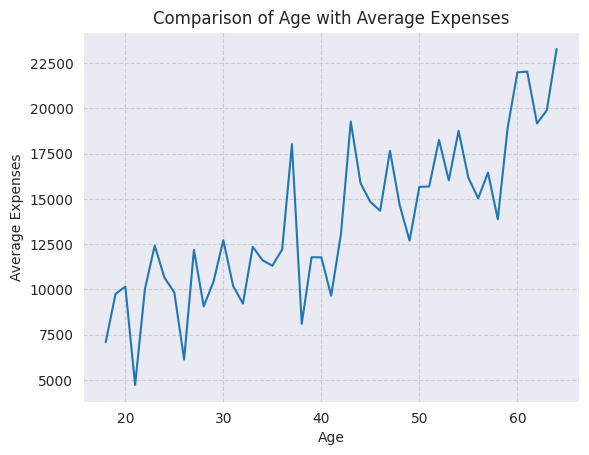

In [ ]:
average_expenses_by_age = dataset.groupby('age')['expenses'].mean()

plt.plot(average_expenses_by_age.index, average_expenses_by_age.values)
plt.xlabel('Age')
plt.ylabel('Average Expenses')
plt.title('Comparison of Age with Average Expenses')
plt.show()

**Increasing Trend:**  
We observed a positive correlation between age and average expenses, with older individuals incurring higher health insurance costs.

**Steep Rise After Middle Age:**  
The increase in average expenses becomes much more noticeable after the age of 40–50. This likely reflects the higher health risks and medical needs associated with aging.

**Variability at Younger Ages:**  
For younger individuals, expenses remain relatively stable, with only minor fluctuations. This is expected since health risks are generally lower in this age group.

**Highest Expenses for Older Age Groups:**  
The oldest individuals in the dataset (around 60–64 years) have the highest average expenses. This trend aligns with the increased likelihood of chronic conditions or significant medical interventions as people age.

### Smoke with Expenses

In this bar plot, we compared the mean and median health insurance expenses for smokers and non-smokers. Our goal was to evaluate the impact of smoking status on insurance expenses and highlight the significant differences between these two groups.


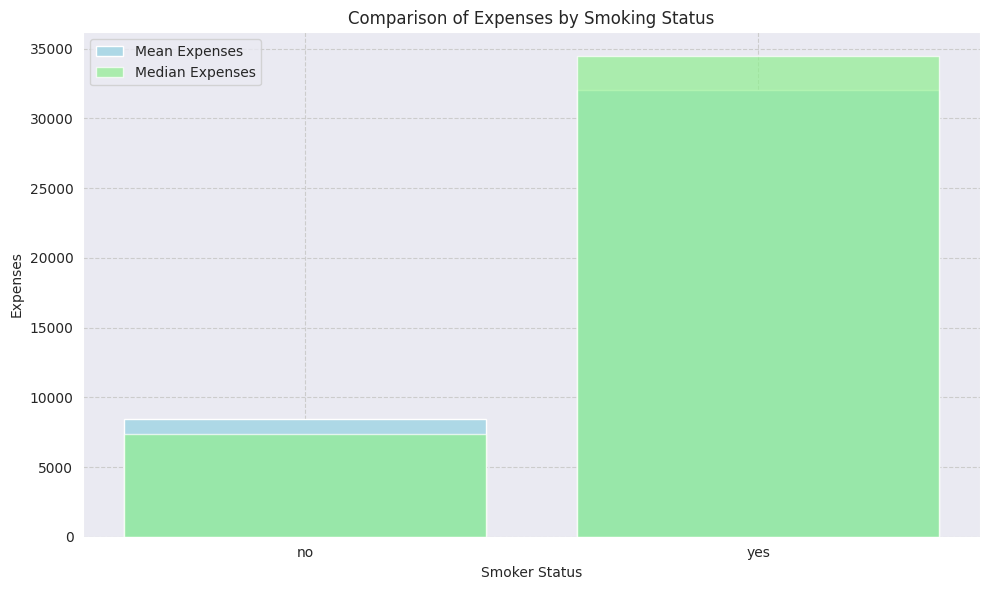

In [ ]:
expense_summary = dataset.groupby('smoker').expenses.agg(["mean", "median", "count"])

# Plotting the results
plt.figure(figsize=(10, 6))

# Bar plot for mean and median expenses
plt.bar(expense_summary.index, expense_summary['mean'], color='lightblue', label='Mean Expenses')
plt.bar(expense_summary.index, expense_summary['median'], color='lightgreen', label='Median Expenses', alpha=0.7)

# Adding labels and title
plt.xlabel('Smoker Status')
plt.ylabel('Expenses')
plt.title('Comparison of Expenses by Smoking Status')
plt.legend()
plt.xticks(rotation=0)
plt.tight_layout()

plt.show()

**Significant Expense Difference:**  
We found that smokers have substantially higher mean and median expenses compared to non-smokers. This reinforces that smoking is a major factor driving up health insurance costs.

**Mean vs. Median:**  
For smokers, We noticed that the mean expense is much higher than the median, which suggests the presence of extreme outliers—individuals with very high expenses. On the other hand, for non-smokers, the mean and median are much closer, indicating a more uniform distribution of expenses.

### BMI vs Expense vs Sex

In this scatter plot, We examined the relationship between Body Mass Index (BMI) and expenses, highlighting data points by gender (male and female). The goal was to identify patterns in expenses based on BMI and to analyze whether gender has any influence on this relationship.

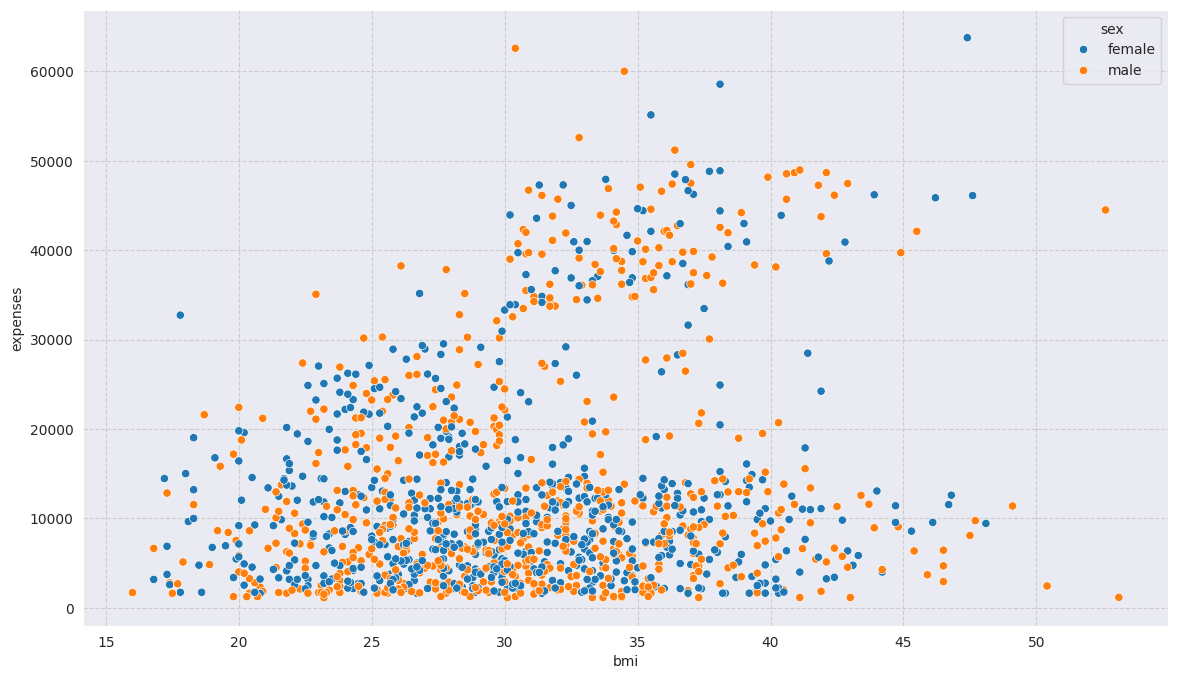

In [ ]:
plt.figure(figsize=(14, 8))
sns.scatterplot(data=dataset, x='bmi', y='expenses', hue='sex')
plt.show()

**Positive Correlation Between BMI and Expenses:**  
We observed that expenses generally increase with higher BMI values, likely reflecting the health risks associated with higher BMI, such as obesity-related conditions. However, the trend isn't perfectly linear, as there's some variability at higher BMI levels.

**Gender Influence:**  
We found no significant difference in the relationship between BMI and expenses based on gender. Both males and females show similar trends, with expenses increasing as BMI rises. That said, there’s a slight variation in the dispersion of data points, with males appearing to have slightly higher expenses in certain BMI ranges.

Additionally, We noticed a few individuals with very high BMI values (above 40) or extremely high expenses (over $50,000). These could represent outliers with unique health conditions or special circumstances.

### BMI vs Expense vs Smoker

In this scatter plot, we explored the relationship between Body Mass Index (BMI) and health insurance expenses, differentiating data points based on smoking status.Our goal was to identify patterns in expenses and understand how they are influenced by BMI and smoking habits.


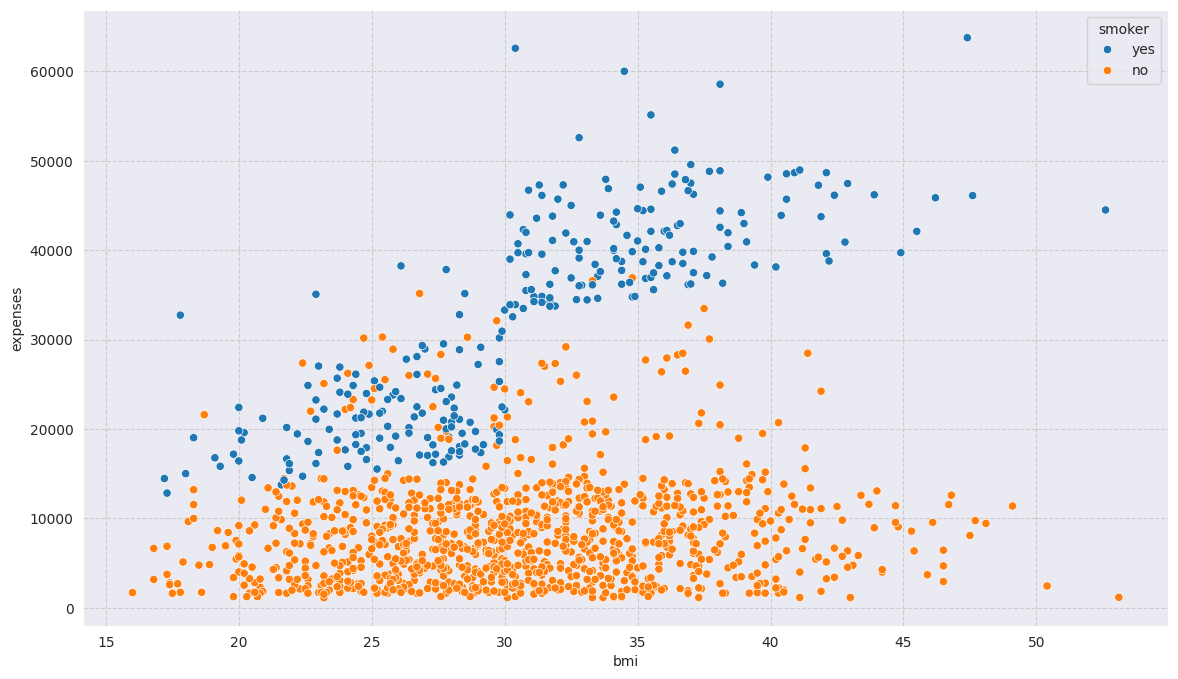

In [ ]:
plt.figure(figsize=(14,8))
sns.scatterplot(data=dataset, x='bmi', y='expenses', hue='smoker')
plt.show()

**Higher Expenses for Smokers:**  
We noticed that smokers consistently have much higher insurance expenses compared to non-smokers across all BMI ranges. Even smokers with lower BMI values incur significantly higher costs than non-smokers with similar BMI.

**BMI-Expense Relationship:**  
For both smokers and non-smokers, We observed that insurance expenses increase as BMI values rise. However, the increase is much steeper for smokers, highlighting the impact of smoking on health insurance costs.

### BMI vs Expense vs Region

In this scatter plot, we visualized the relationship between Body Mass Index (BMI) and health insurance expenses, categorizing the data by region. Our goal was to examine whether regional differences impact the relationship between BMI and expenses and to identify any specific patterns unique to each region.


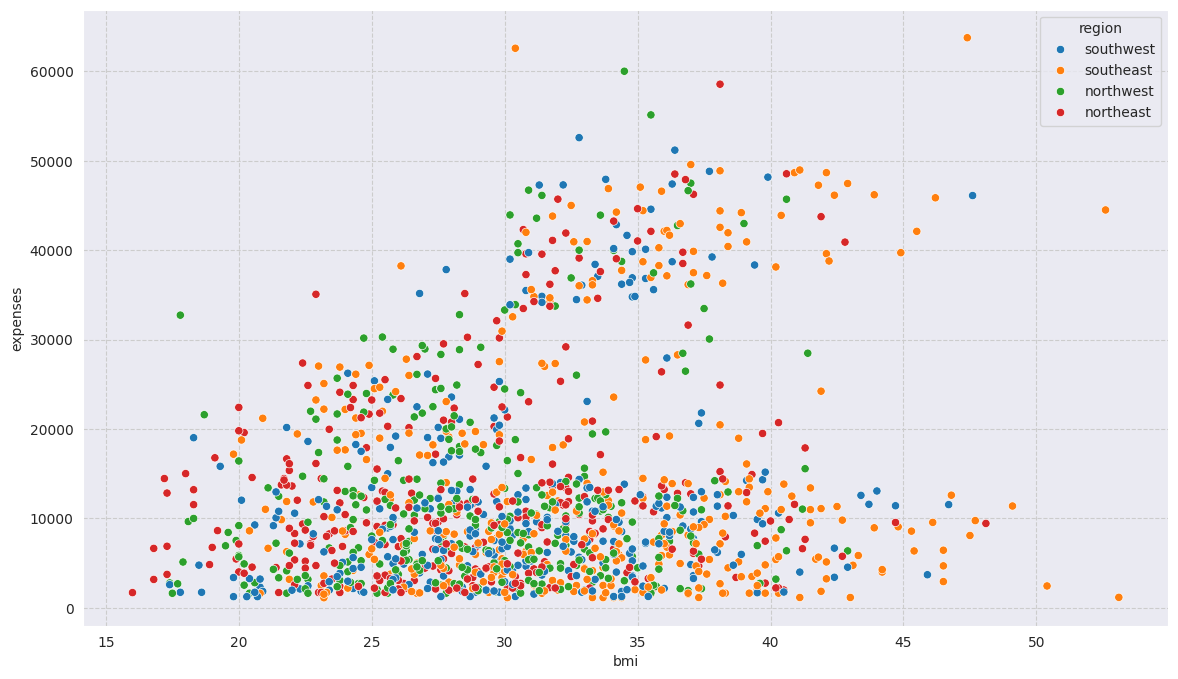

In [ ]:
plt.figure(figsize=(14, 8))
sns.scatterplot(data=dataset, x='bmi', y='expenses', hue='region')
plt.show()

**Similar Trends Across Regions:**  
We noticed that the overall relationship between BMI and expenses is consistent across all regions. Higher BMI values generally lead to higher expenses, regardless of the region.

**Southeast Region Shows Higher Expenses:**  
We also observed that individuals in the southeast region tend to have higher expenses compared to other regions, especially at higher BMI values. This supports my earlier findings that the southeast has the highest average expenses.

### BMI Vs Expense Vs Children Vs Age

In this scatter plot, we visualized the relationship between Body Mass Index (BMI) and health insurance expenses, adding extra dimensions for deeper insights:

- **Children:** We used color coding to show the number of dependent children for each individual.  
- **Age:** The size of each data point represents the individual's age, providing additional context to the analysis.

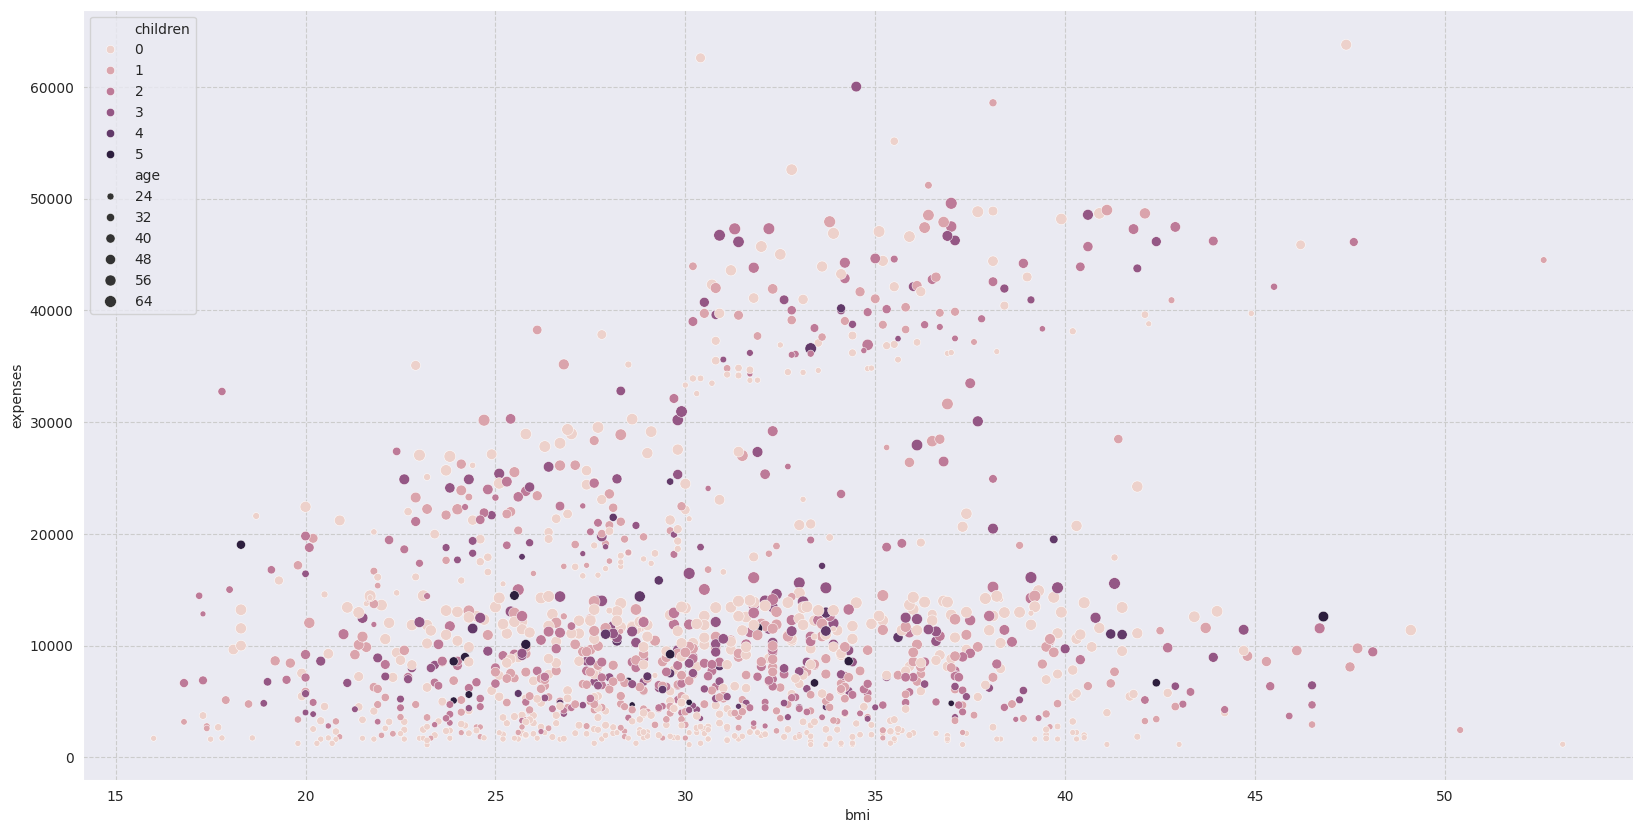

In [ ]:
plt.figure(figsize=(20,10))
sns.scatterplot(data=dataset, x='bmi', y='expenses', hue='children', size='age')
plt.show()

We observed that expenses generally increase with higher BMI values, which is consistent with my earlier analyses. However, the relationship becomes more dispersed for individuals with more children and at older ages.

When looking at the impact of the number of children, we noticed that individuals with more children tend to incur higher expenses. This suggests that the number of dependents is a significant factor in health insurance costs. Expenses increase even more noticeably for families with two or more children.

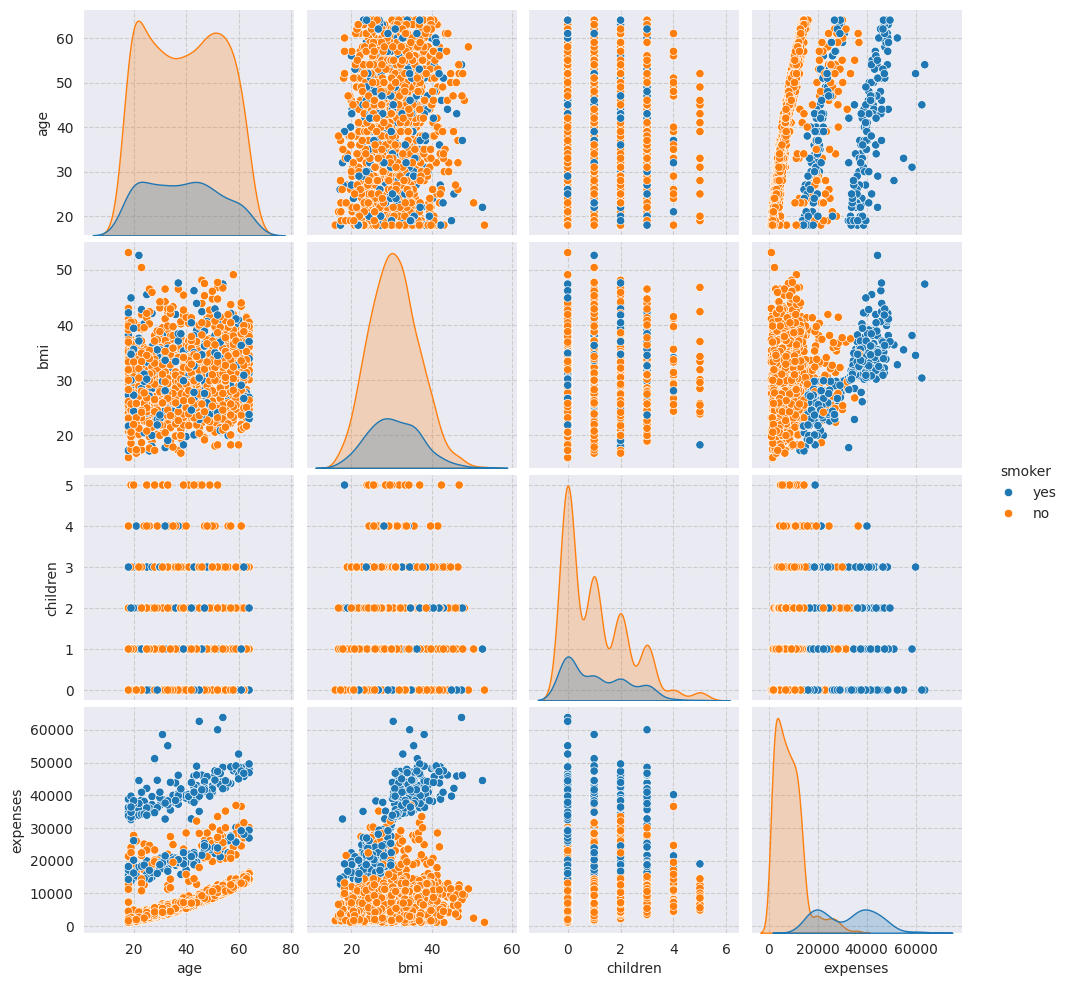

In [ ]:
sns.pairplot(dataset, hue='smoker')


In our analysis, the pair plot reveals the relationship between age, BMI, number of children, and medical expenses, with a focus on smoking status. We found that smokers consistently incur higher medical costs than non-smokers. Expenses rise with age, especially for smokers, and BMI is more strongly linked to costs for smokers. The number of children has little impact on expenses. The KDE plots show smokers have a wider and higher distribution of medical costs. Overall, this underscores the significant financial burden of smoking, particularly in healthcare.

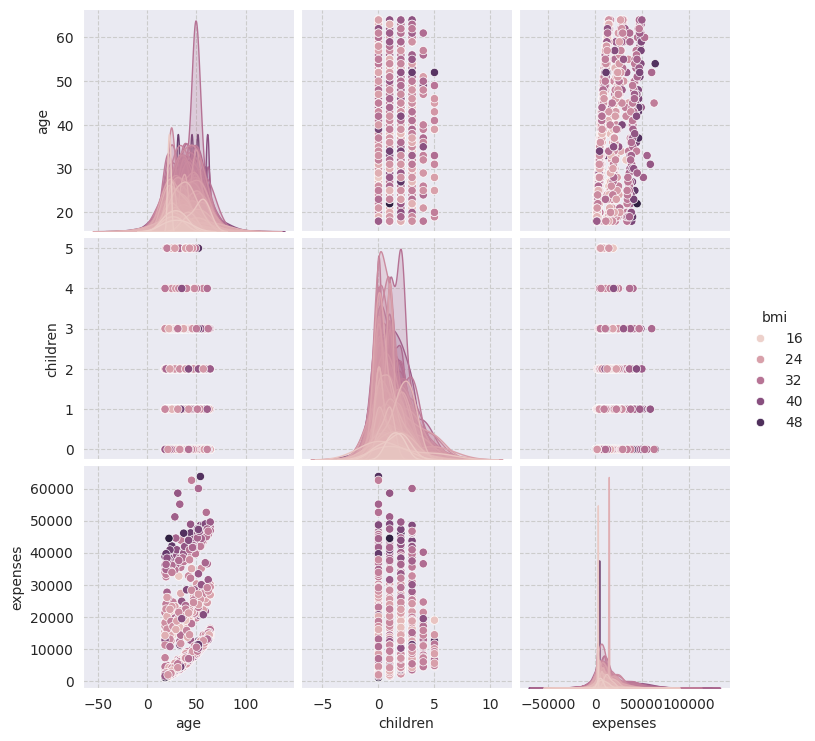

In [ ]:
sns.pairplot(dataset, hue='bmi')



From this plot, we can see that as our BMI (the darker purple shades) and age go up, so do medical expenses. The number of children doesn’t seem to make much of a difference, but what really stands out is how most of us have lower costs, while a few face really high expenses. It’s a reminder of how our BMI and age can impact our financial and health outcomes over time.

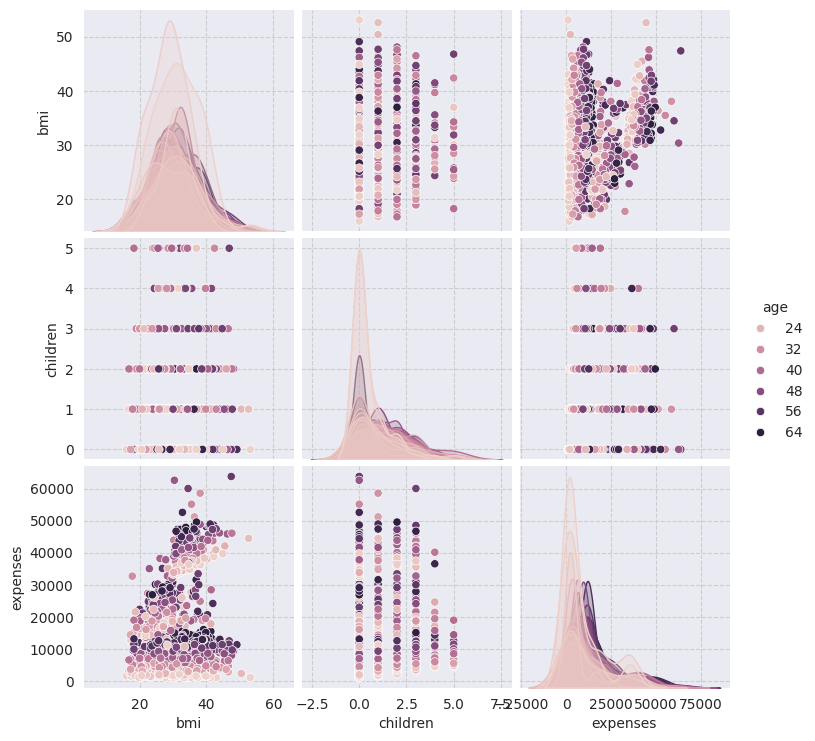

In [ ]:
sns.pairplot(dataset, hue='age')


In this plot, we added age as a gradient, with darker points representing older individuals, and it gave us some interesting insights. We can see that age plays a big role as older people tend to have higher expenses, especially when their BMI is on the higher side. Most of us are clustered around a BMI of 25–30, have 0–2 kids, and typically spend between 10,000  and 20,000. Interestingly, the number of children doesn’t seem to be tied to age as people across all age groups have similar numbers of kids. Overall, we can see that age and BMI influence expenses the most, while the other variables remain fairly consistent.


## Let's explore the relationships among the features in greater detail.










**Correlation Matrix**

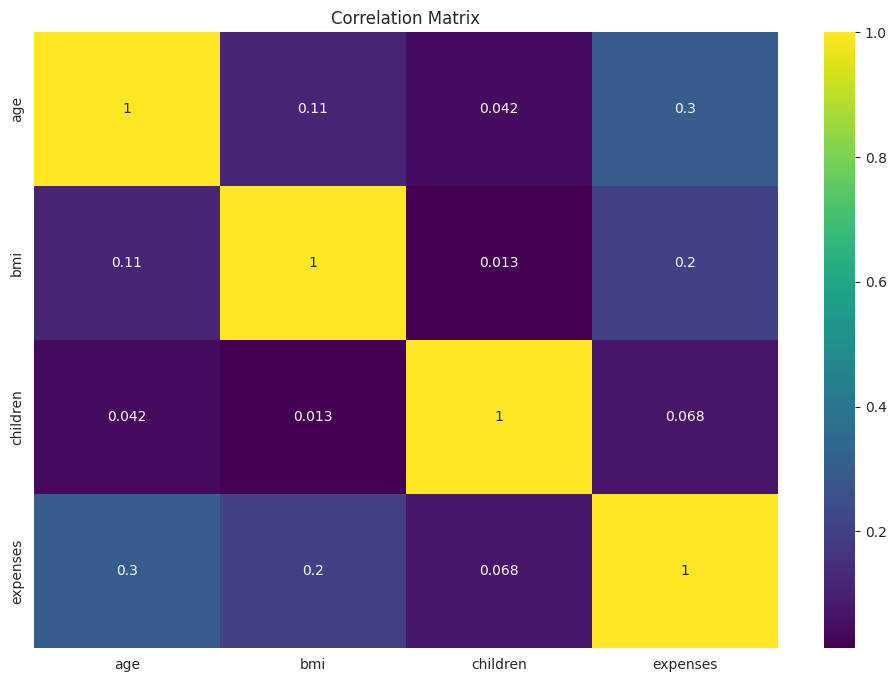

In [ ]:
# Selecting only numeric columns for correlation
numeric_dataset = dataset.select_dtypes(include=[np.number])

# Calculating the correlation matrix
corr = numeric_dataset.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='viridis')  # Change 'viridis' to your preferred colormap
plt.title('Correlation Matrix')
plt.show()

We can see how our variables are connected in this correlation matrix. Age and expenses have the strongest relationship, with a moderate positive correlation (0.3), showing that as we get older, our expenses tend to increase. BMI also has a weak positive correlation with expenses (0.2), hinting that higher BMI might lead to slightly higher costs, likely tied to health factors. Interestingly, the number of children doesn’t seem to have much impact on expenses (0.068), and its connection to other variables like age and BMI is almost nonexistent. Overall, we can say that age and BMI play the biggest roles in influencing expenses, while the number of children barely makes a difference.


 # Visualizing the Relationship Between Expense and Age

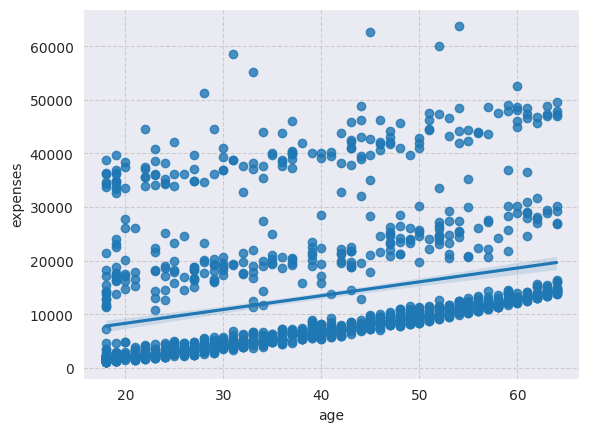

In [ ]:
sns.regplot(data=dataset, x='age', y='expenses')

plt.show()

The scatter plot shows a positive correlation between age and insurance expenses. As age increases, insurance expenses also tend to rise, as indicated by the upward slope of the regression line.
Relationship Between Age and Expenses:

Younger individuals, particularly those in their 20s and 30s, generally have lower insurance expenses.
Expenses increase progressively with age, likely due to higher health risks and medical care needs associated with aging.

# Exploring Pairwise Relationships with sns.pairplot()







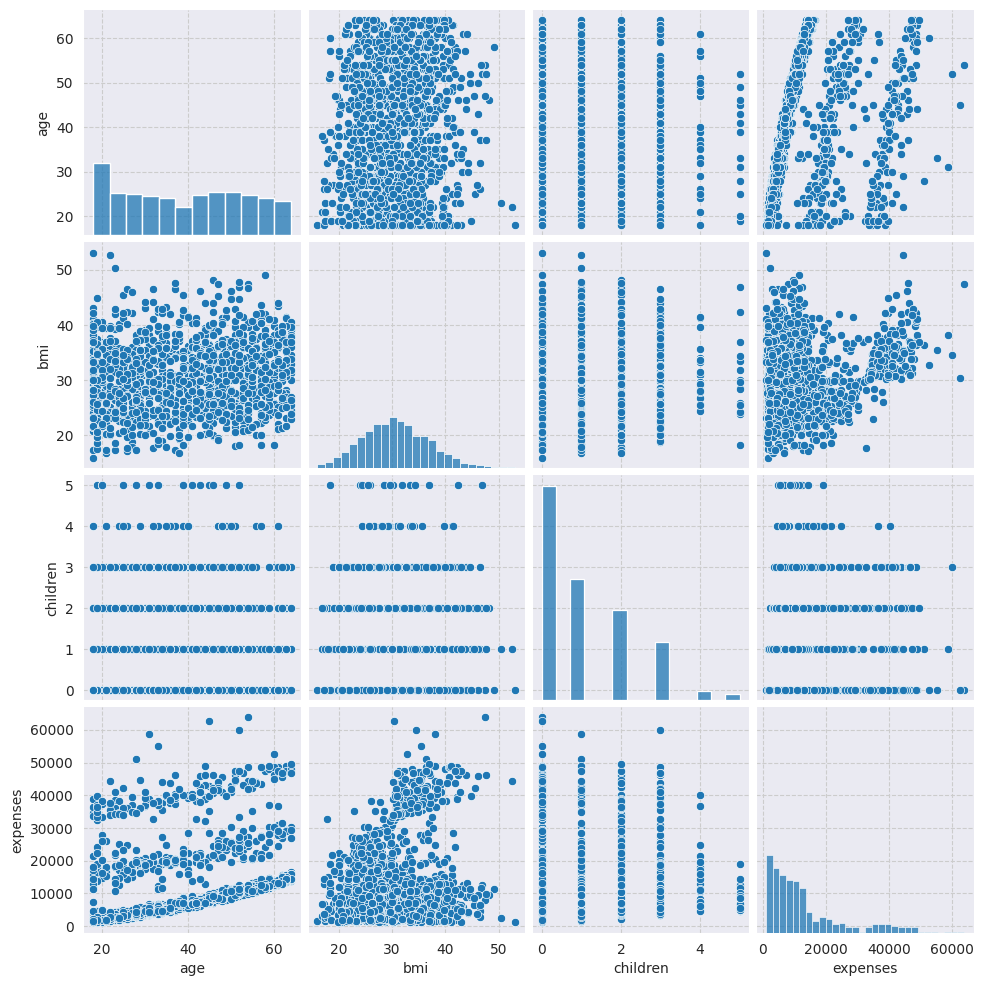

In [ ]:
sns.pairplot(dataset)


The pair plot provides a visual representation of relationships between numerical features in the dataset: age, bmi, children, and expenses. Here's what can be observed:

**Age vs. Expenses:**

There is a positive correlation between age and expenses. Older individuals tend to have higher insurance costs, likely due to increased health risks.
A cluster of high expense outliers exists across all age groups, suggesting additional factors like smoking or pre-existing conditions.

**BMI vs. Expenses:**

A positive trend is observed between bmi and expenses, especially for higher BMI values. This indicates that individuals with higher BMI tend to incur higher insurance costs, potentially due to health risks associated with obesity.
There are a few high-expense outliers in the lower BMI range, likely influenced by other factors like smoking status.

**Children vs. Expenses:**

Insurance expenses increase as the number of children rises, but the relationship is not strongly linear. For individuals with 4 or more children, expenses tend to plateau or decrease slightly.
A large number of individuals with no children (0) have lower expenses on average.

**Distributions of Individual Variables:**

Age: The distribution is fairly uniform across the dataset, with a slight increase in representation for older individuals.

BMI: Most individuals have BMI values concentrated between 20 and 35, with a relatively normal distribution.

Children: Most individuals have 0 to 2 children, with fewer cases for 3 or more children.

Expenses: The distribution is positively skewed, with most expenses concentrated in the lower range, but with several high-expense outliers.

# **Data Preprocessing**

In [ ]:

# Import the shallow utitilities
%run pmlm_utilities_shallow.ipynb



### Getting more insight on Target Dataset

# Random Seed

We set a random seed to ensure reproducibility in the experiments. This guarantees that every time the code is run, the results remain consistent, even when working with algorithms or functions that involve randomness.


In [ ]:
# The random seed
random_seed = 40

# Set random seed in tensorflow
tf.random.set_seed(random_seed)

# Set random seed in numpy
np.random.seed(random_seed)

The seed value 40 is chosen arbitrarily and acts as the initializer for the random number generator.

# Loading the Dataset

In [ ]:
dataset_raw= pd.read_csv("/content/insurance.csv")
# Make a copy of dataset_raw
dataset = dataset_raw.copy(deep=True)
# Set the target
target="expenses"

1. Loads the dataset, insurance.csv, into a pandas DataFrame.
2. Creates a copy of the dataset for manipulation and analysis without altering the original data.
3. Assigns the column name "expenses" to the variable target.

In [ ]:
# Print the dimensions

pd.DataFrame([[dataset.shape[0], dataset.shape[1]]], columns=['# rows', '# columns'])


# rows  # columns
0    1338          7

This creates a summary DataFrame showing the number of rows and columns in the dataset.

In [ ]:
dataset.head()

age     sex   bmi  children smoker     region  expenses
0   19  female  27.9         0    yes  southwest  16884.92
1   18    male  33.8         1     no  southeast   1725.55
2   28    male  33.0         3     no  southeast   4449.46
3   33    male  22.7         0     no  northwest  21984.47
4   32    male  28.9         0     no  northwest   3866.86

Here we displayed the first five rows of the DataFrame by default. This is a quick and effective way to understand the structure and content of the dataset, including its column names and some sample data.

In [ ]:
dataset.tail()

age     sex   bmi  children smoker     region  expenses
1333   50    male  31.0         3     no  northwest  10600.55
1334   18  female  31.9         0     no  northeast   2205.98
1335   18  female  36.9         0     no  southeast   1629.83
1336   21  female  25.8         0     no  southwest   2007.95
1337   61  female  29.1         0    yes  northwest  29141.36

We displayed the last five rows of the DataFrame by default. This helps verify the structure at the end of the dataset and check for any anomalies, such as trailing missing values.

# Splitting the Dataset

In [ ]:
from sklearn.model_selection import train_test_split


# Step 1: Split the data into training (80%) and test (20%)
dataset_train, dataset_test = train_test_split(
    dataset,
    train_size=0.8,
    random_state=random_seed,

)

# Step 2: Split the test data into validation (10%) and test (10%)
dataset_val, dataset_test = train_test_split(
    dataset_test,
    train_size=0.5,
    random_state=random_seed,

)

# Reset the index
dataset_train, dataset_val, dataset_test = (
    dataset_train.reset_index(drop=True),
    dataset_val.reset_index(drop=True),
    dataset_test.reset_index(drop=True)
)


This code splits the dataset into training, validation, and test subsets to ensure proper evaluation of the machine learning model.

dataset_train: Contains 80% of the data for training.

dataset_val: Contains 10% of the data for validation.

dataset_test: Contains 10% of the data for final testing.


### Printing the number of rows and columns in a test ,train and validation of dataset

In [ ]:
# Assuming dataset_train, dataset_val, and dataset_test are your splits
train_shape = pd.DataFrame([[dataset_train.shape[0], dataset_train.shape[1]]], columns=['# rows', '# columns'])
val_shape = pd.DataFrame([[dataset_val.shape[0], dataset_val.shape[1]]], columns=['# rows', '# columns'])
test_shape = pd.DataFrame([[dataset_test.shape[0], dataset_test.shape[1]]], columns=['# rows', '# columns'])



# Display the shapes
print(train_shape)
print(val_shape)
print(test_shape)

   # rows  # columns
0    1070          7
   # rows  # columns
0     134          7
   # rows  # columns
0     134          7


In this code, we generated a summary of the dataset splits (`dataset_train`, `dataset_val`, `dataset_test`) by creating a DataFrame that shows the number of rows and columns in each subset. This provides a quick and clear way to confirm that the splits were created correctly and align with expectations.

### Handling uncommon features


Identifying uncommon features


In [ ]:
# Using the common_var_checker function
df_common_var = common_var_checker(dataset_train, dataset_val, dataset_test, target)

# Print the result
print(df_common_var)


  common var
0        age
1        bmi
2   children
3   expenses
4     region
5        sex
6     smoker


We ran the code to check common variable but it seems all the features are common .


In [ ]:
uncommon_feature_train_not_val_test = np.setdiff1d(dataset_train.columns, df_common_var['common var'])

# Print the uncommon features
pd.DataFrame(uncommon_feature_train_not_val_test, columns=['uncommon feature'])


Empty DataFrame
Columns: [uncommon feature]
Index: []

In this code, we identified any uncommon features in the training dataset that were not present in the validation or test datasets. This was done by comparing the columns in dataset_train  against the list of common variables stored in df_common_var.

The result shows that there are no uncommon features between the training, validation, and test datasets. This confirms that all datasets share the same set of features.

###  Handling identifiers

Combining the training, validation and test data


In [ ]:
df = pd.concat([dataset_train, dataset_val, dataset_test], sort=False)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 1338 entries, 0 to 133
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 83.6+ KB
None


### Identifying missing values


In [ ]:
df_nan = nan_checker(df)

# Print df_nan
df_nan

Empty DataFrame
Columns: [var, proportion, dtype]
Index: []

In [ ]:
df.isnull().values.sum()


0

From the above output , we can see that there are no values in the table.

### Identifying Identifiers

In [ ]:
df_id = id_checker(df)

# Print the first 5 rows of df_id
df_id.head()


Empty DataFrame
Columns: []
Index: [0, 1, 2, 3, 4]

As the dataset does not contain any identifier columns, there is no need to remove such columns.

### Seperating the training , validation and test data

In [ ]:
# Separating the training data
df_train = df.iloc[:dataset_train.shape[0], :]

# Separating the validation data
df_val = df.iloc[dataset_train.shape[0]:dataset_train.shape[0] + dataset_val.shape[0], :]

# Separating the test data
df_test = df.iloc[dataset_train.shape[0] + dataset_val.shape[0]:, :]

print(pd.DataFrame([[df_train.shape[0], df_train.shape[1]]], columns=['# rows', '# columns']))
print(pd.DataFrame([[df_val.shape[0], df_val.shape[1]]], columns=['# rows', '# columns']))
print(pd.DataFrame([[df_test.shape[0], df_test.shape[1]]], columns=['# rows', '# columns']))


   # rows  # columns
0    1070          7
   # rows  # columns
0     134          7
   # rows  # columns
0     134          7


The output confirms that the dataset has been correctly split into training, validation, and test subsets, with the expected proportions.



### Encoding the data

Combining the training, validation and test data
`

In [ ]:
# Combine df_train, df_val and df_test
df = pd.concat([df_train, df_val, df_test], sort=False)

# Print the unique data type of variables in df
pd.DataFrame(df.dtypes.unique(), columns=['dtype'])

dtype
0    int64
1   object
2  float64

We combined the separated datasets (`df_train`, `df_val`, `df_test`) back into a single dataset (`df`) and checked the unique data types of the variables in the combined DataFrame.

### Identifying Categorical Values

In [ ]:
# Call cat_var_checker on df
# See the implementation in pmlm_utilities.ipynb
df_cat = cat_var_checker(df)

# Print the dataframe
df_cat



var  nunique
0  region        4
1     sex        2
2  smoker        2

Indicates the number of unique values in each categorical column:

region: 4 unique values (e.g., northeast, northwest, southeast, southwest).

sex: 2 unique values (e.g., male, female).

smoker: 2 unique values (e.g., yes, no).

### Encoding Categorical Data

In [ ]:
df = pd.get_dummies(df, columns=np.setdiff1d(df_cat['var'], [target]))

# Print the first 5 rows of df
df.head()

age   bmi  children  expenses  region_northeast  region_northwest  \
0   26  23.7         2   3484.33             False             False   
1   18  30.4         3   3481.87              True             False   
2   52  31.2         0   9625.92             False             False   
3   25  20.8         1   3208.79             False             False   
4   43  35.0         1  41034.22              True             False   

   region_southeast  region_southwest  sex_female  sex_male  smoker_no  \
0             False              True       False      True       True   
1             False             False       False      True       True   
2             False              True        True     False       True   
3             False              True        True     False       True   
4             False             False       False      True      False   

   smoker_yes  
0       False  
1       False  
2       False  
3       False  
4        True

In this code, we performed one-hot encoding on the categorical variables in the dataset. This process created binary columns for each unique value in the categorical features. The resulting dataset ('df') now has all categorical data converted into numerical form, making it ready for machine learning models.This is important because data is ready for machine learning models without introducing bias or incorrect assumptions.


In [ ]:
# Separating the training data
df_train = df.iloc[:df_train.shape[0], :]

# Separating the validation data
df_val = df.iloc[df_train.shape[0]:df_train.shape[0] + df_val.shape[0], :]

# Separating the test data
df_test = df.iloc[df_train.shape[0] + df_val.shape[0]:, :]




This code separates a concatenated DataFrame (df) back into the training, validation, and test datasets using slicing based on the original dimensions of each split.



### Train Dataset

In [ ]:
pd.DataFrame([[df_train.shape[0], df_train.shape[1]]], columns=['# rows', '# columns'])


# rows  # columns
0    1070         12

The output shows the shape of the training dataset (df_train) after we re-separated it from the concatenated DataFrame (df).

It confirms that the training dataset contains 1,070 rows, which matches the expected 80% of the original dataset.








### Validation Dataset

In [ ]:
pd.DataFrame([[df_val.shape[0], df_val.shape[1]]], columns=['# rows', '# columns'])


# rows  # columns
0     134         12

We generated a summary of the validation dataset df_val by creating a DataFrame that shows the number of rows and columns. The output confirms that the validation dataset has 134 rows and 12 columns, which matches the expected results after preprocessing.

### Test Dataset

In [ ]:
pd.DataFrame([[df_test.shape[0], df_test.shape[1]]], columns=['# rows', '# columns'])


# rows  # columns
0     134         12

In this code, we generated a summary of the test dataset ('df_test') by creating a DataFrame that shows the number of rows and columns. This provides a quick overview of the dataset's size.

### Splitting the feature and target

In [ ]:
# Get the feature matrix
X_train = df_train[np.setdiff1d(df_train.columns, [target])].values
X_val = df_val[np.setdiff1d(df_val.columns, [target])].values
X_test = df_test[np.setdiff1d(df_test.columns, [target])].values

# Get the target vector
y_train = df_train[target].values
y_val = df_val[target].values
y_test = df_test[target].values

In this code, we separated the feature matrix (X) and target vector (y) for the training, validation, and test datasets. This is a standard step to prepare the data before feeding it into machine learning models.





## Evaluate Models

We selected the Linear Regressor, Support Vector Regressor (SVR), Decision Tree Regressor, and Random Forest Regressor because they provide diverse strategies for addressing the problem. Each model contributes a unique perspective:

1. **Linear Regression:**  
   We started with Linear Regression because it’s the simplest and most straightforward model. It assumes a straight-line relationship between the features and the target, making it a great starting point to see if simple patterns in the data explain the outcomes.

2. **Support Vector Regressor (SVR):**  
   SVR was included because it can handle both linear and non-linear relationships, thanks to its use of kernels. It’s great when we suspect there might be some subtle patterns in the data that aren’t captured by simpler models.

3. **Decision Tree Regressor:**  
   Decision Trees are intuitive and can capture complex, non-linear relationships in the data. They split the data into smaller groups based on feature values, making them easy to understand. However, we know they can overfit, so it’s interesting to see how they perform compared to other models.

4. **Random Forest Regressor:**  
   Random Forest is like an upgraded version of Decision Trees. By combining multiple trees, it reduces the risk of overfitting and tends to generalize better. It’s often a go-to model for its balance of accuracy and robustness.

We picked these models to explore different ways of understanding the data—starting with simple, interpretable models and moving toward more advanced ones that can handle complexity. This variety helps us figure out which approach works best for our dataset.

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [ ]:
models = {
    "Linear Regressor": LinearRegression(),
    "Support Vector Regressor": SVR(),
    "Decision Tree Regressor": DecisionTreeRegressor(),
    "Random Foresst Regressor": RandomForestRegressor()

}


We created a dictionary of regression models to make it easier to train and evaluate different machine learning algorithms. We included four popular regression models, all set up with their default configurations, so we can quickly compare their performance and see how they stack up against each other.


In [ ]:

def evaluate_models(X_train, X_test, y_train, y_test, models):
    models_list = []  # To store the models
    scores = []  # To store the evaluation scores

    # Iterate through each model
    for key, model in models.items():
        # Fit the model on the training data
        model.fit(X_train, y_train)

        # Print the model name and separator
        print(key)
        print("-------------------------------------")

        # Make predictions on training and test data
        pred_train = model.predict(X_train)  # Use X_train for training predictions
        pred_test = model.predict(X_test)    # Use X_test for test predictions

        # Calculate and print MAE (Mean Absolute Error)
        print("MAE")
        print(f"Train: {mean_absolute_error(y_train, pred_train)}")
        print(f"Test: {mean_absolute_error(y_test, pred_test)}")
        print("======================================")

        # Calculate and print MSE (Mean Squared Error)
        print("MSE")
        print(f"Train: {mean_squared_error(y_train, pred_train)}")
        print(f"Test: {mean_squared_error(y_test, pred_test)}")
        print("======================================")

        # Calculate and print R2 (R-squared) scores
        print("R2 Scores")
        print(f"Train: {r2_score(y_train, pred_train)}")
        print(f"Test: {r2_score(y_test, pred_test)}")
        print("--------------------------------------")

        # Append the model to the list and its test R2 score to scores
        models_list.append(model)  # Store the model itself
        scores.append(r2_score(y_test, pred_test))  # Store the R2 score on test data

    return models_list, scores

models_list, scores = evaluate_models(X_train, X_test, y_train, y_test, models)


Linear Regressor
-------------------------------------
MAE
Train: 4103.467102620253
Test: 4523.646427532622
MSE
Train: 35738280.16494278
Test: 42129707.90080714
R2 Scores
Train: 0.7548668746307532
Test: 0.7413378922451316
--------------------------------------
Support Vector Regressor
-------------------------------------
MAE
Train: 8280.089678437065
Test: 8903.52544697551
MSE
Train: 161015442.83479524
Test: 175571825.06624803
R2 Scores
Train: -0.10442412317100547
Test: -0.07795141710761033
--------------------------------------
Decision Tree Regressor
-------------------------------------
MAE
Train: 17.889140186915885
Test: 3184.0897761194024
MSE
Train: 171211.415095514
Test: 42725469.320000745
R2 Scores
Train: 0.9988256404872435
Test: 0.7376801193317644
--------------------------------------
Random Foresst Regressor
-------------------------------------
MAE
Train: 989.4402126635512
Test: 2753.6622634328364
MSE
Train: 3403532.974294846
Test: 26202724.38914398
R2 Scores
Train: 0.976654

Here’s how the performance of four regression models—Linear Regression, Support Vector Regression (SVR), Decision Tree Regression, and Random Forest Regression—stacked up when we evaluated them on our dataset. We used three key metrics to assess their effectiveness: Mean Absolute Error (MAE), Mean Squared Error (MSE), and R-squared (R²). Here’s what we found:

**Best Model: Random Forest Regressor**  
Out of all the models, we found that the Random Forest Regressor performed the best. It achieved the highest R² score on the test set (0.8391) while also delivering the lowest MAE and MSE. This shows that Random Forest was the most accurate in capturing patterns in the data and generalizing well to unseen samples.

**Overfitting Concern: Decision Tree Regressor**  
The Decision Tree Regressor showed clear signs of overfitting. While it performed exceptionally well on the training data with a near-perfect R² score, its test performance dropped significantly. This imbalance suggests that the model was too tailored to the training data and struggled to generalize.

**Linear Regression**  
Linear Regression gave us decent results but couldn’t compete with Random Forest. Its simplicity makes it a great baseline model, but its inability to handle non-linear relationships limited its accuracy for this dataset.

**SVR: Room for Improvement**  
Support Vector Regression (SVR) struggled on both the training and test datasets. Its poor performance suggests that it may not be the best fit for this problem in its current configuration. We believe that with proper hyperparameter tuning, SVR’s performance could improve, but for now, it didn’t meet our expectations.

**Conclusion**  
Based on these results, we found Random Forest to be the most reliable model for this dataset, while Decision Tree highlighted the importance of addressing overfitting. Linear Regression served as a solid baseline, and SVR’s performance suggests it needs further refinement.

## **Actual Expenses Vs Predicted Expense**

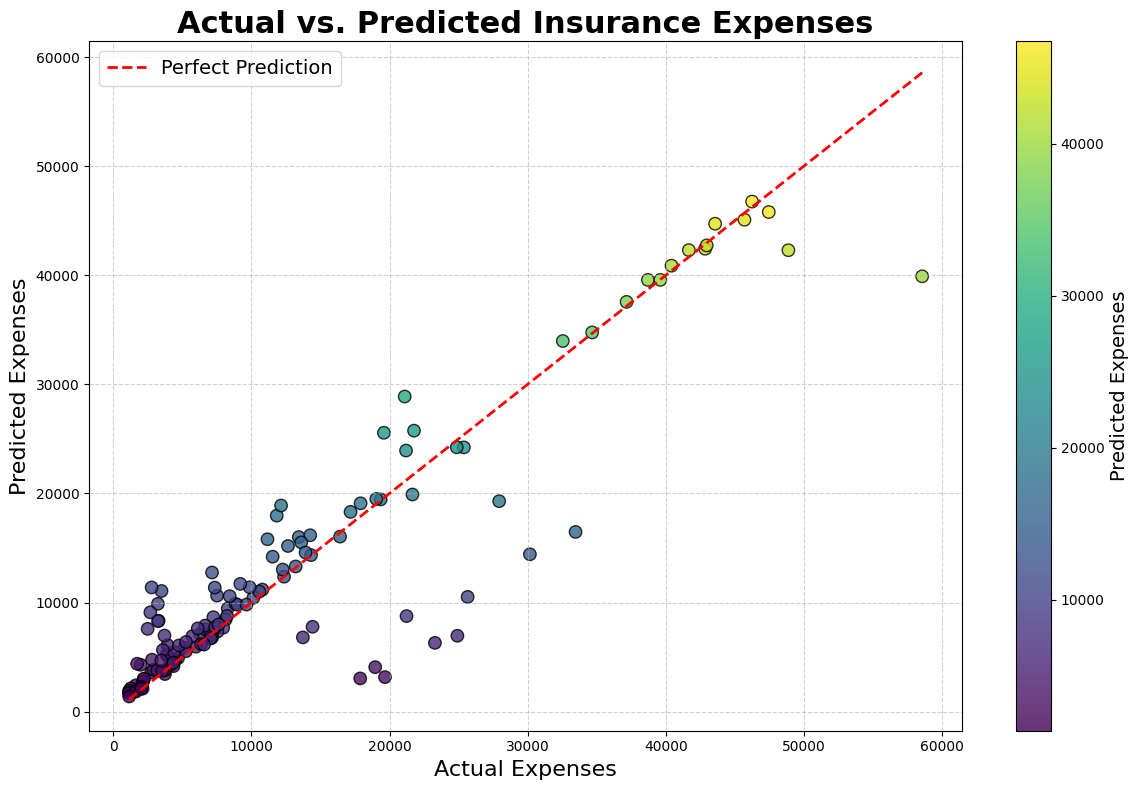

In [ ]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=40)
rf_model.fit(X_train, y_train)

test_predict = rf_model.predict(X_test)
# Plotting
plt.figure(figsize=(12, 8))
plt.title("Actual vs. Predicted Insurance Expenses", fontsize=22, fontweight='bold')
plt.xlabel("Actual Expenses", fontsize=16)
plt.ylabel("Predicted Expenses", fontsize=16)

# Scatter plot of actual vs predicted
plt.scatter(
    y_test, test_predict,
    c=test_predict,  # Color based on predicted values
    cmap='viridis',  # Use a visually appealing colormap
    alpha=0.8,       # Slight transparency for overlap visibility
    edgecolor='black',
    s=80             # Adjust size for clarity
)

# Add a diagonal line to indicate perfect predictions
diagonal = np.linspace(min(y_test), max(y_test), 100)
plt.plot(diagonal, diagonal, color='red', linestyle='--', linewidth=2, label="Perfect Prediction")

# Add grid for better readability
plt.grid(visible=True, which='both', linestyle='--', alpha=0.6)

# Add a color bar to indicate the scale of predicted values
cbar = plt.colorbar()
cbar.set_label('Predicted Expenses', fontsize=14)

# Add a legend
plt.legend(fontsize=14)

# Show the plot
plt.tight_layout()
plt.show()



**Insights from the Plot:**

1. **Strong Positive Correlation:**  
We observed a strong positive correlation between the actual and predicted insurance expenses. Most points lie close to the red diagonal line, indicating that the model performs well in predicting expenses.

2. **Outliers:**  
We identified a few points that deviate significantly from the diagonal line. These outliers highlight cases where the model either overestimates or underestimates the actual expenses.

3. **Prediction Spread:**  
The color gradient, representing the predicted expenses, remains consistent along the diagonal line. This reassures us that the Random Forest model is capturing the range of expense values accurately.

4. **Model Fit:**  
While the model predicts most expenses accurately, we noticed that prediction errors are larger for higher expense values. This is a common observation in regression models, as higher values tend to exhibit more variability.

5. **Practical Implications:**  
This visualization confirms that the model is reliable for making predictions within the general range of expenses in the dataset. However, we may need to refine the model further to handle extreme values more effectively.

#**Conclusion**

Through this project, we explored the key factors influencing health insurance expenses and used machine learning to predict these costs effectively. By analyzing variables like BMI, age, smoking status, and region, we gained meaningful insights into how these factors drive insurance premiums.

Out of the models we tested, the **Random Forest Regressor** stood out as the most reliable. It performed the best in capturing complex patterns in the data while maintaining accuracy on unseen samples. Simpler models like Linear Regression gave us a solid starting point, while Decision Tree and SVR helped us understand how more specialized approaches handle the data.

We also noticed areas where we can improve. Outliers posed a challenge, and refining the model or incorporating more data could help make predictions even better. Each model taught us something valuable, whether it was about simplicity, overfitting, or flexibility.

In the end, this project showed us how machine learning can be a powerful tool to make insurance pricing more transparent. By helping individuals understand what affects their premiums and giving insurers the tools to design fairer policies, we’ve taken a step toward making the process more efficient and data-driven.